<>:39: SyntaxWarning: invalid escape sequence '\D'
<>:39: SyntaxWarning: invalid escape sequence '\D'
C:\Users\garciaba\AppData\Local\Temp\ipykernel_3348\3913085149.py:39: SyntaxWarning: invalid escape sequence '\D'
  plt.title('$\Delta$ P(destroy)')


0.2029993192097764


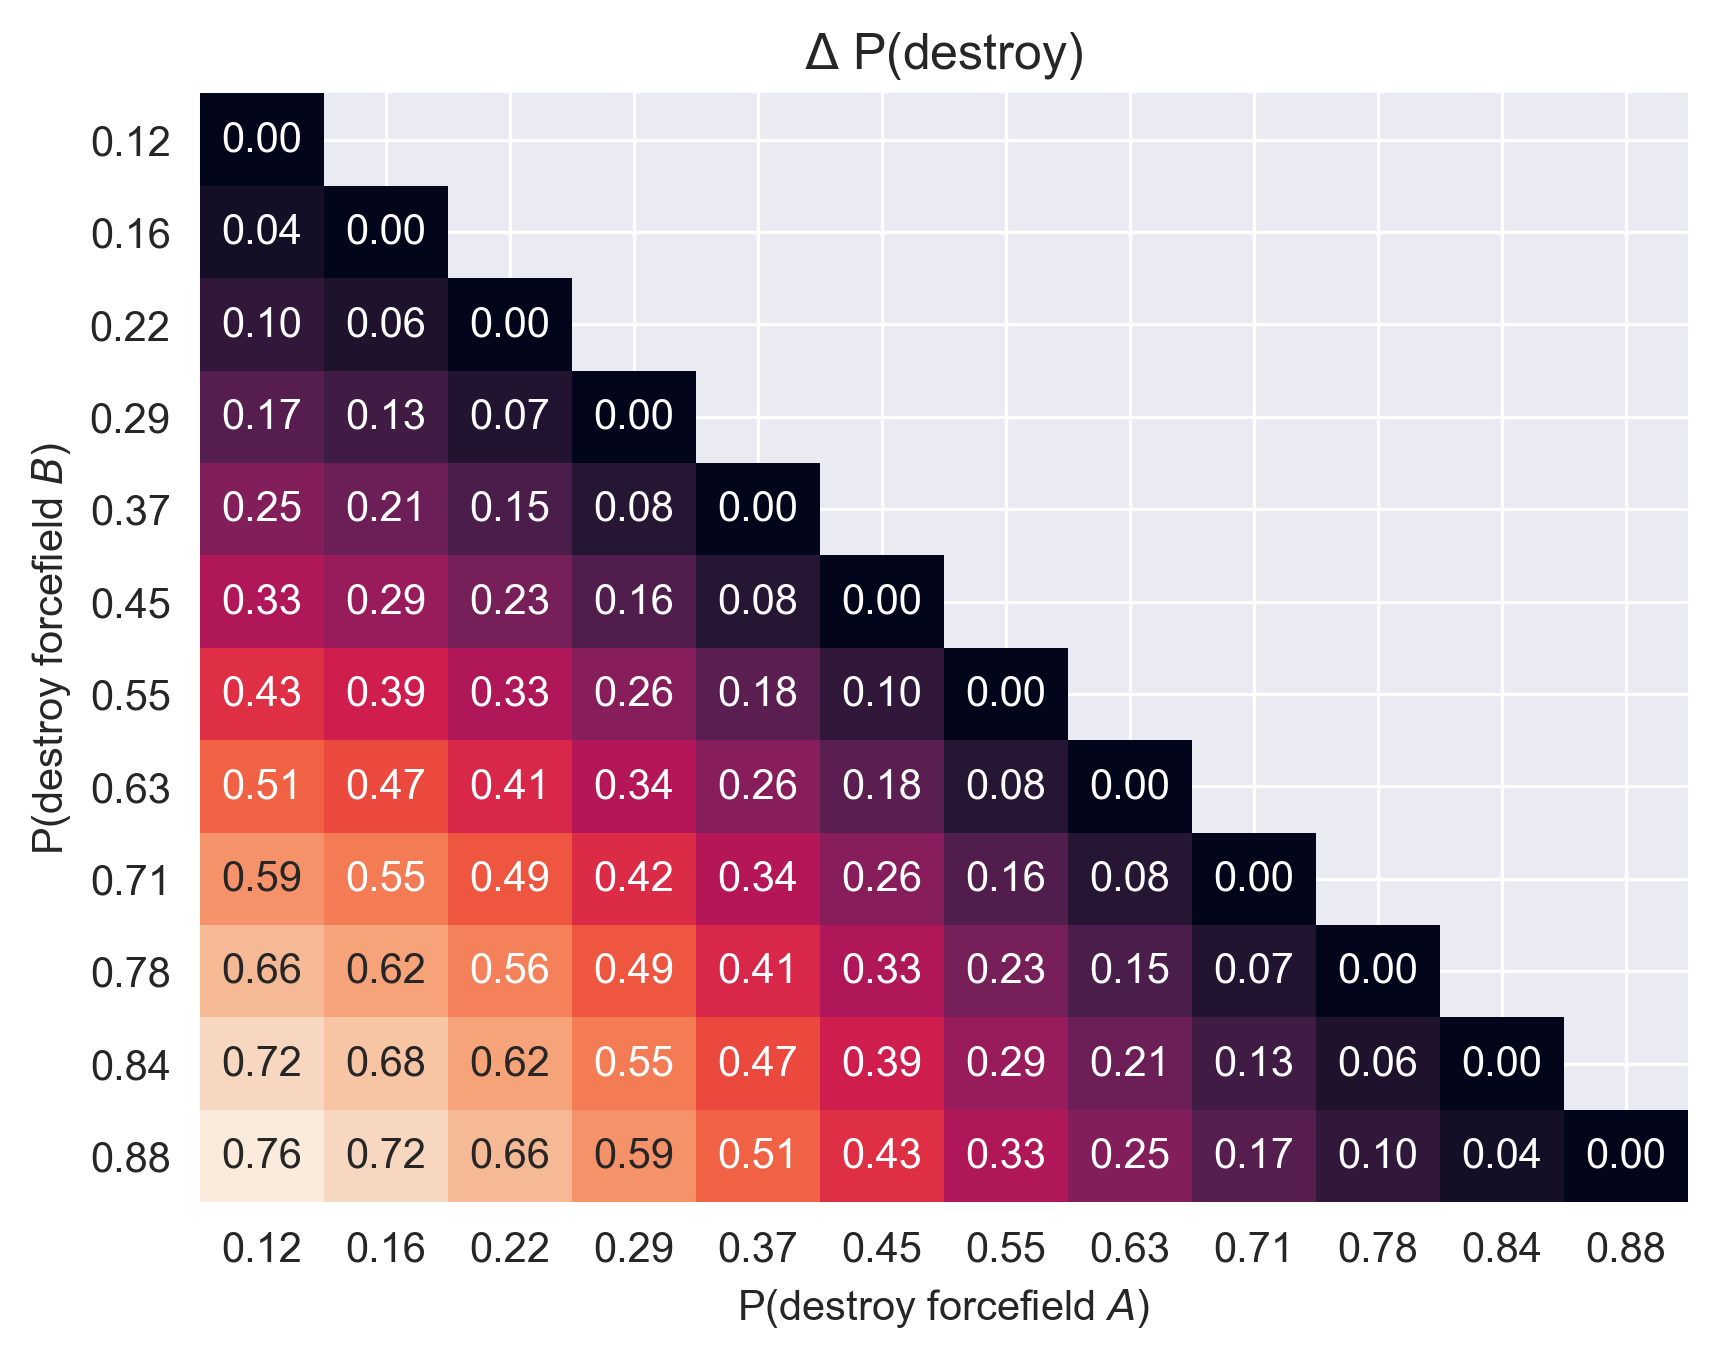

In [1]:
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

values = [0.07692308, 0.15384615, 0.23076923, 0.30769231,
          0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
          0.76923077, 0.84615385, 0.92307692]

slope = 2
# logistic function
logistic = lambda x: 1/(1+np.exp(-slope*x))

p = logistic(np.linspace(-1, 1, 12)).round(2)

# Compute all possible deltas as np matrix
all_deltas = np.empty((len(p), len(p)))
for i in range(len(p)):
    for j in range(len(p)):
        all_deltas[i, j] = abs(p[j] - p[i])

sns.set({'figure.dpi': 300})
# plot deltas in heattmap 
# set x and y using values as labels
# hide half of the heatmap
mask = np.zeros_like(all_deltas)
mask[np.triu_indices_from(mask)] = True
# but keep matrix diagonal
mask[np.diag_indices_from(mask)] = False
sns.heatmap(np.array(all_deltas), cbar=False, xticklabels=p, yticklabels=p, annot=True, fmt='.2f', mask=mask)
# sns.heatmap(np.array(all_deltas), cmap='RdBu_r', cbar=False, xticklabels=p, yticklabels=p, annot=True, fmt='.2f')
# Sort deltas in descending order
# sorted_deltas = sorted(all_deltas, reverse=True)
# print("All Deltas:")
# for delta in all_deltas:
    # print(delta)
# ylabel 45 degree rotation
plt.yticks(rotation=0)
plt.title('$\Delta$ P(destroy)')
plt.xlabel('P(destroy forcefield $A$)')
plt.ylabel('P(destroy forcefield $B$)')
all_deltas = np.array(all_deltas).flatten()
print(np.std((all_deltas)[all_deltas != 0]))


<Axes: ylabel='Count'>

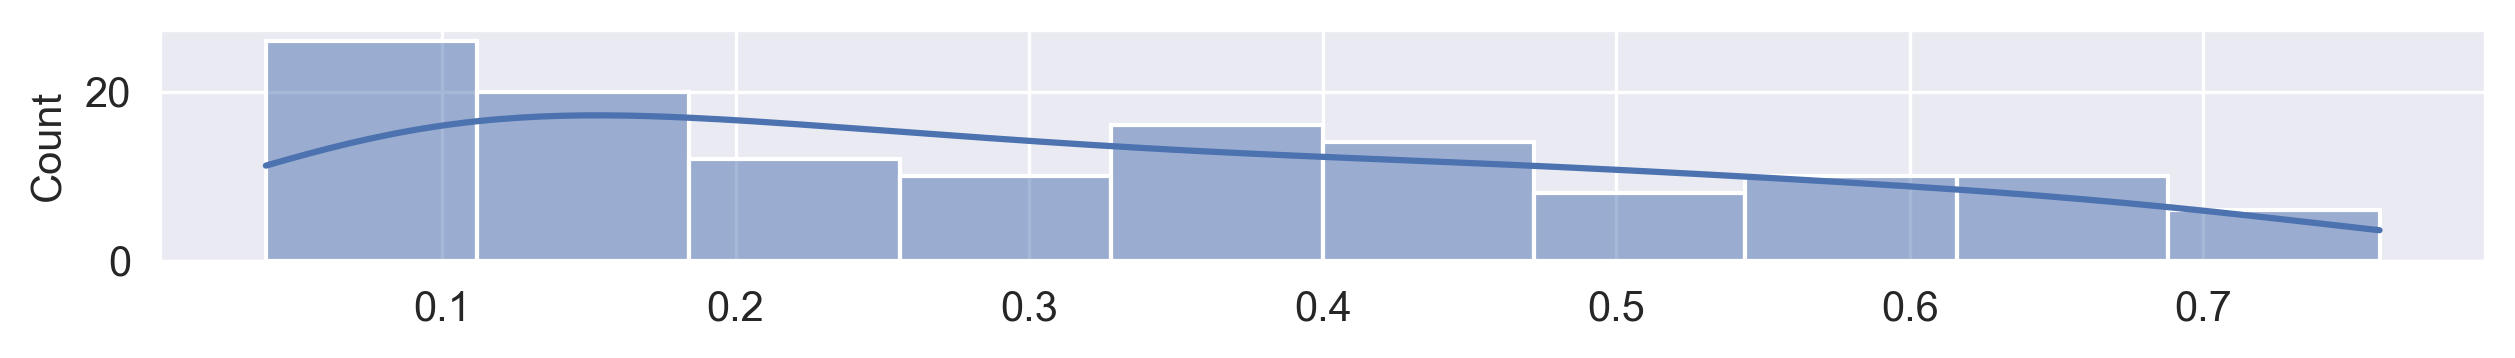

In [243]:
sns.histplot(all_deltas[all_deltas != 0], bins=10, kde=True)

* New pairs (to update)

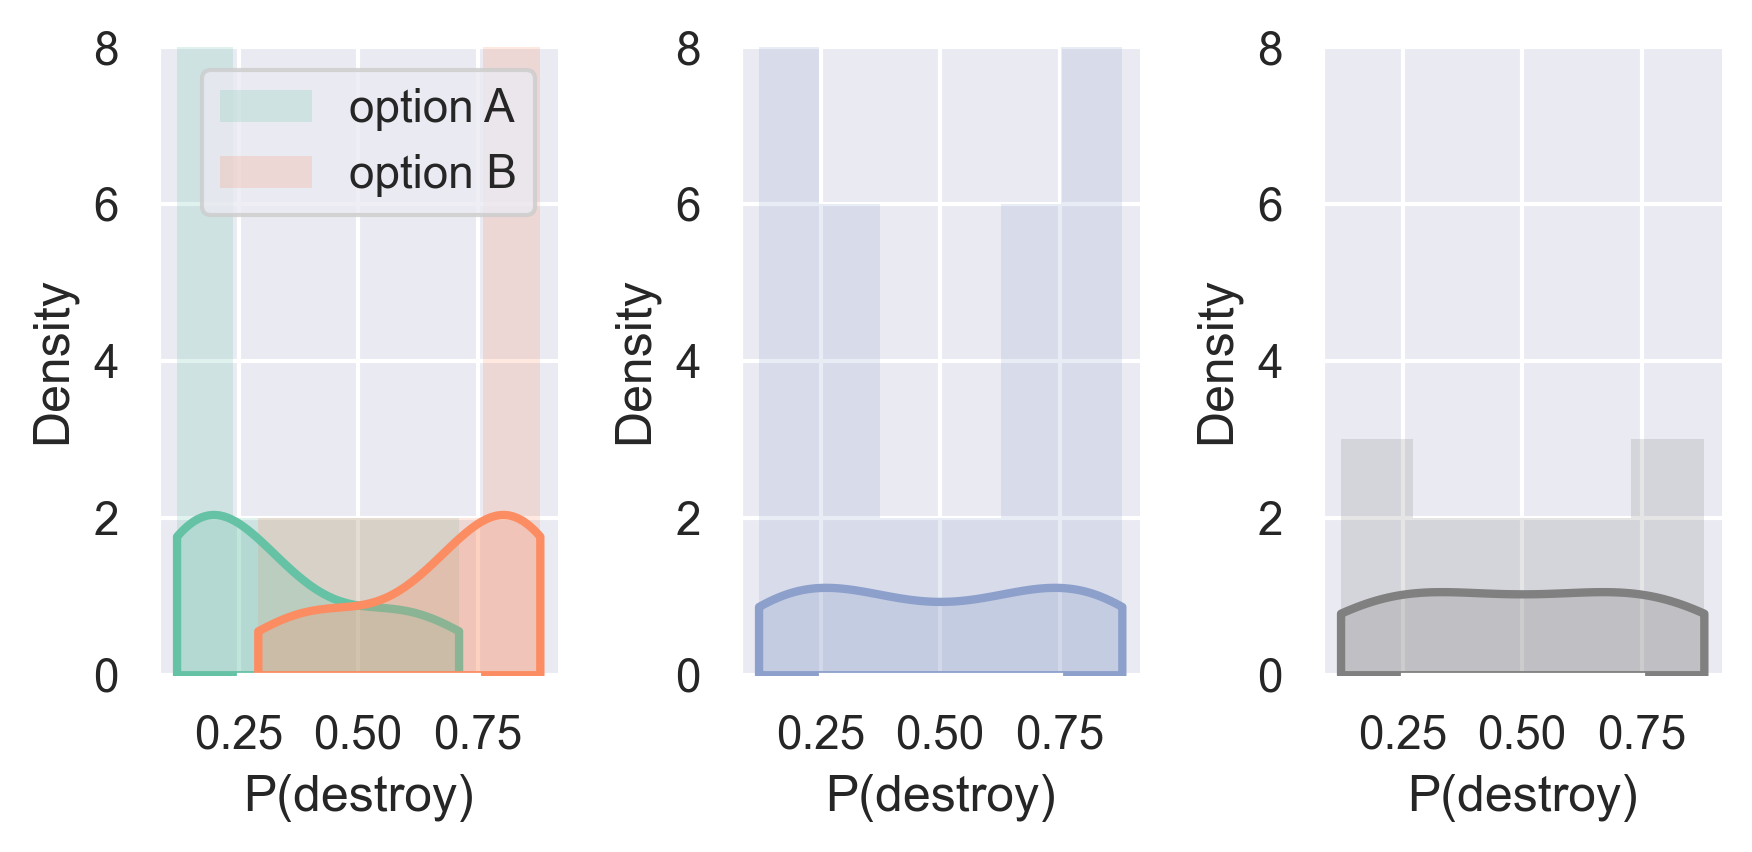

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={'figure.figsize':(6,3), 'figure.dpi': 300})
sns.set_palette('Set2')


x = [(0.16, 0.29),
 (0.71, 0.84),
 (0.22, 0.37),
 (0.63, 0.78),
 (0.55, 0.78),
 (0.22, 0.45),
 (0.37, 0.63),
 (0.55, 0.88),
 (0.12, 0.45),
 (0.29, 0.71),
 (0.16, 0.63),
 (0.37, 0.84),
 (0.12, 0.71),
 (0.29, 0.88),
 (0.16, 0.84),
 (0.12, 0.88)]


x = np.array(x)

# plot hist of x

plt.subplot(1, 3, 1)
sns.histplot(x[:,0],label='option A', color='C0', edgecolor='none', alpha=.2)
sns.histplot(x[:,1], label='option B', color='C1', edgecolor='none', alpha=.2)
sns.kdeplot(x[:,0], color='C0', lw=2, fill=True, alpha=0.25, cut=0)
sns.kdeplot(x[:,1], color='C1', lw=2, fill=True, alpha=0.25, cut=0)
plt.ylabel('Density')
plt.ylim(0, 8)
plt.legend()
sns.despine(trim=True)
plt.xlabel('P(destroy)')

plt.subplot(1, 3, 3)
sns.kdeplot(np.unique(x.flatten()), color='grey', lw=2, fill=True, alpha=0.25, cut=0)
sns.histplot(np.unique(x.flatten()), label='original dist', color='grey', edgecolor='none', alpha=.20)
plt.ylim(0, 8)
sns.despine(trim=True)
plt.xlabel('P(destroy)')

plt.subplot(1, 3, 2)
sns.kdeplot(x.flatten(), color='C2', lw=2, fill=True, alpha=0.25, cut=0)
sns.histplot(x.flatten(), label='pooled', color='C2', edgecolor='none', alpha=.20)
sns.despine(trim=True)
plt.ylim(0, 8)
plt.xlabel('P(destroy)')
plt.tight_layout()

([<matplotlib.axis.XTick at 0x2180667b5f0>,
 [Text(0, 0, 'paired A'),
  Text(1, 0, 'paired B'),
  Text(2, 0, 'paired (pooled)'),
  Text(3, 0, 'original')])

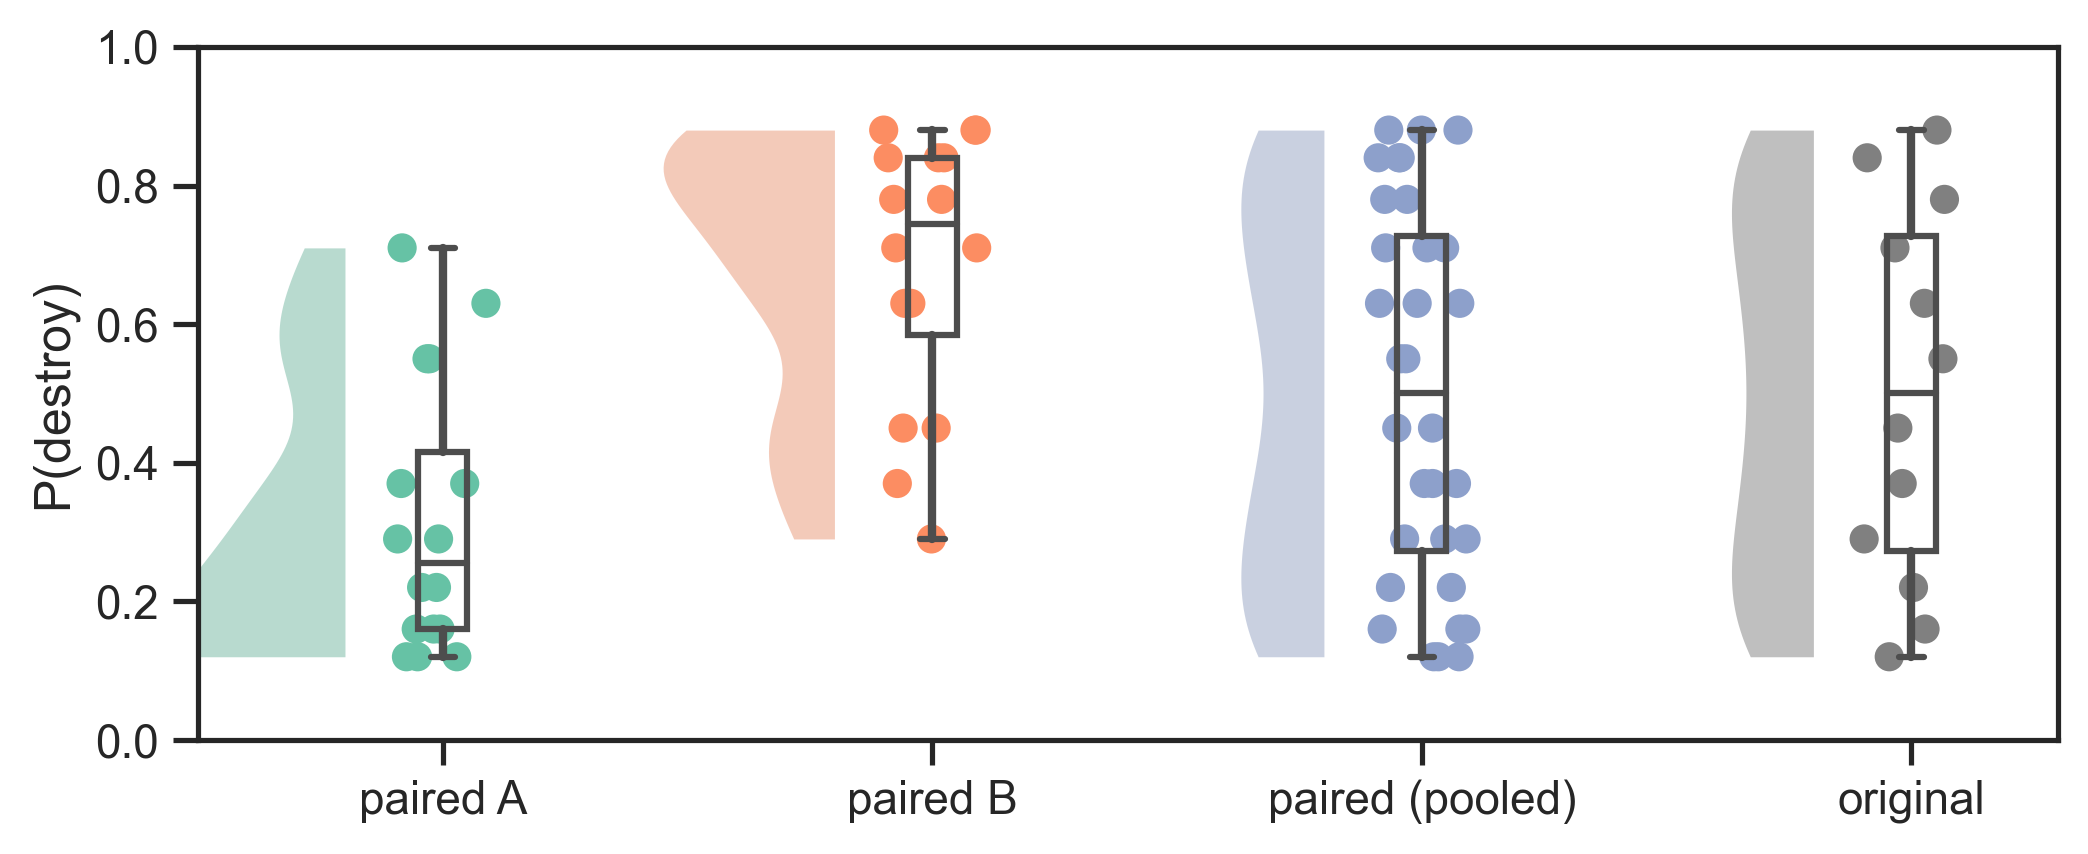

In [2]:
from ptitprince import PtitPrince as pt
sns.set_style('ticks')
plt.figure(figsize=(8,3), dpi=300)
pt.RainCloud(data=[x[:, 0], x[:, 1], x.flatten(), np.unique(x.flatten())], width_viol=.7, 
             width_box=.1, dodge=True,  bw=.4,  alpha=0.5, linewidth=0, point_size=7, palette=['C0', 'C1', 'C2', 'grey'])
plt.ylim(0, 1)
plt.ylabel('P(destroy)')
plt.xlabel('')
plt.xticks([0, 1, 2, 3], ['paired A', 'paired B', 'paired (pooled)', 'original'])

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/bhv/spaceprl(13).csv')

# exclude participants  before 2024-02-22

# last batch
last_mask = (df.datetime.str.contains('2024-03-07')) | (df.datetime.str.contains('2024-03-06'))
# reverse probabilities
reverse_mask = df.datetime.str.contains('2024-03-08')
df = df[reverse_mask]


# df = df[df.prolificID == 'basiletest']
# print shape[0] for each participant
df = df.groupby('prolificID').filter(lambda x: x.shape[0] > 380)
df = df[df.prolificID!='test']
print(df.groupby('prolificID').size())

df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)
df['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)
# fireTime is in ms, convert to seconds
df['fireTime'] = df.fireTime / 1000
df['trial'] = ((df.t.max()+1) * df.session) + df.t
print('Number of participants:', df.prolificID.nunique())
map_prolificID = {pid: i for i, pid in enumerate(df.prolificID.unique())}
df['id'] = df.prolificID.map(map_prolificID)
x = np.linspace(-1, 1, 12)
pp = (1/(1+np.exp(-2*x))).round(2)


    # break

prolificID
5865bdf7a3462300010673e3    384
58935d5d4d77be0001689f14    398
5d453e8723a5bb0001492546    711
5e1371f92b12bd9a96c2d902    384
601b9077694f034f0092dd8f    384
dtype: int64
Number of participants: 5


In [27]:
# remove duplicated trials
df = df.drop_duplicates(subset=['prolificID', 'session', 't'])
df.groupby('prolificID').size()

prolificID
5865bdf7a3462300010673e3    384
58935d5d4d77be0001689f14    384
5d453e8723a5bb0001492546    384
5e1371f92b12bd9a96c2d902    384
601b9077694f034f0092dd8f    384
dtype: int64

In [28]:
for pid in df.prolificID.unique():
    correct = str(df[df.prolificID==pid].correct.mean())
    string = pid +','+ str((df[(df.prolificID==pid) & (df.destroyed)].outcome.sum()*(0.0035)).round(2)) #+ ',' +  correct
    print(string)


601b9077694f034f0092dd8f,3.57
5e1371f92b12bd9a96c2d902,3.83
5865bdf7a3462300010673e3,4.46
58935d5d4d77be0001689f14,4.13
5d453e8723a5bb0001492546,4.62


In [ ]:
for pid in df.prolificID.unique():
    correct = str(df[df.prolificID==pid].correct.mean())
    string = pid +','+ str((df[(df.prolificID==pid) & (df.destroyed)].outcome.sum()*(0.0035)).round(2)) #+ ',' +  correct
    print(string)


5ef4d8b87faaa00c0dea0c4e,4.22
5b33a01fa8327d0001003821,4.22
5d4869cc692e5400197a980c,4.41
58a229e74d580c0001e0a766,4.66
63b9d3abc3ddc61c8c08fd84,4.38
5f765a3c8a6ec010370c9cc1,4.55
5fb9eb323531776e460fe5e0,3.99
5c23c03889f035000173d7d7,4.6
6579d5a22e0a15c71dd52086,4.67
65593fba029061f69cd8b6ab,4.36


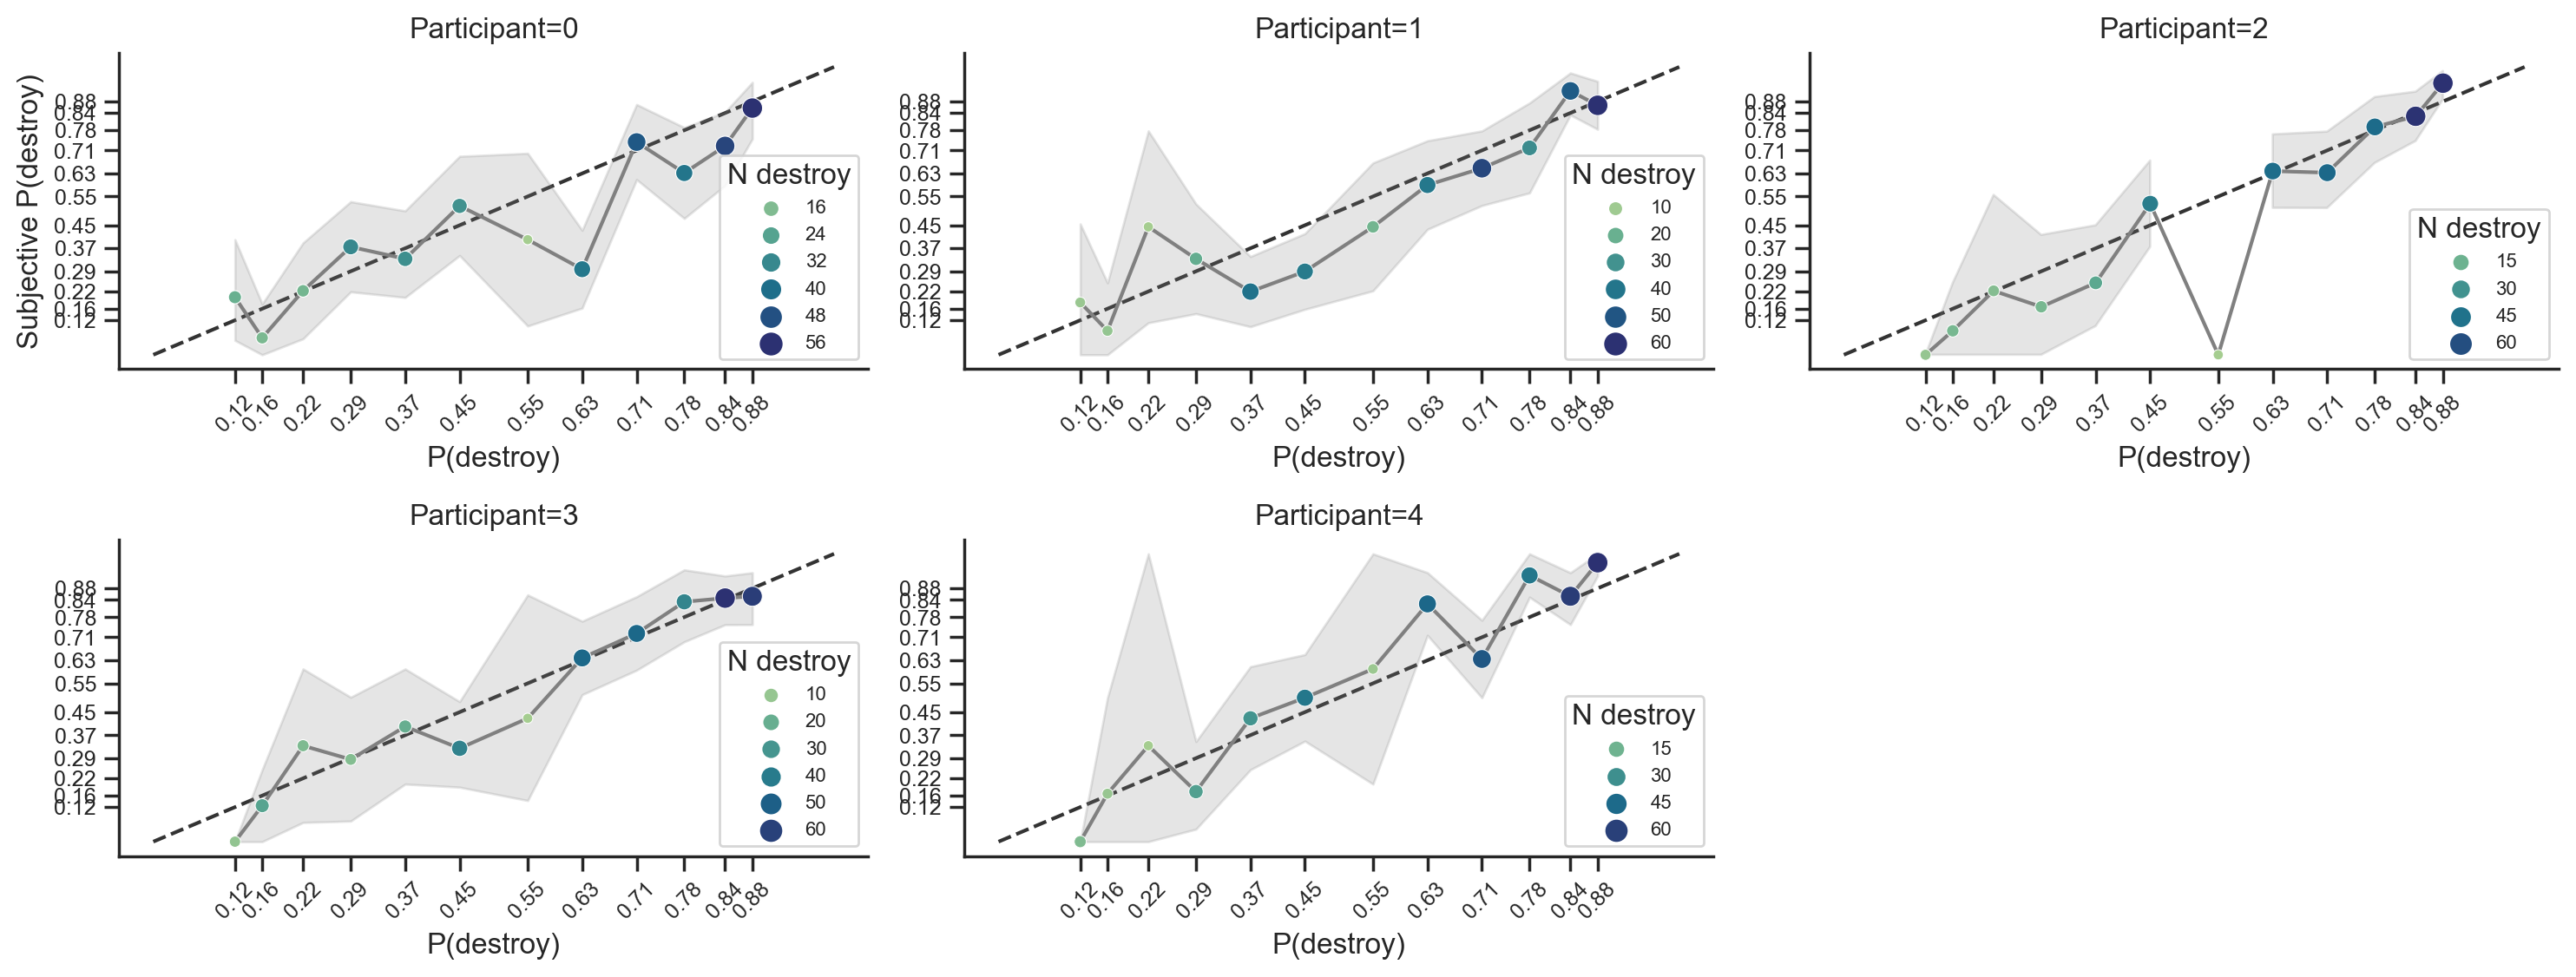

In [4]:
dd = []
for pid in df.id.unique():
    N = {}
    pobserved = {}
    for p in pp:
        ddf = df[(df.id == pid) & (df.session.isin([0, 1, 2, 3, 4, 5]))]
        pobserved[p] = ddf[((ddf.p1==p) & (ddf.choice==1)) | ((ddf.p2==p) & (ddf.choice==2))].destroyed.values
        N[p] = ddf[((ddf.p1==p) & (ddf.choice==1)) | ((ddf.p2==p) & (ddf.choice==2))].shape[0]
        for i in range(N[p]):
            dd.append(
                {
                 'pobserved': pobserved[p][i],   
                 'N': N[p],
                 'p': p,
                 'id': pid,
                }
            )

dd = pd.DataFrame(dd)
sns.set(rc={'figure.figsize':(15,8), 'figure.dpi': 200, 'xtick.labelsize': 9, 'ytick.labelsize': 9})
sns.set_style('ticks')

count = 0

for pid in dd.id.unique():

    count += 1
    
    ddd = dd[dd.id == pid]
    
    plt.subplot(3, 3, count)

    sns.lineplot(x='p', y='pobserved', color='grey', data=ddd, zorder=-1)
    sns.scatterplot(x='p', y='pobserved', size='N', hue='N',
                    data=ddd.filter(['p', 'pobserved', 'N'])
                    .groupby('p').mean().reset_index(), palette='crest')

    plt.ylabel('Subjective P(destroy)')
    plt.xlabel('P(destroy)')

    if count != 1:
        plt.ylabel('')

    plt.yticks(pp)
    plt.xticks(pp)
    plt.legend(title='N observed')
    # change legend size
    plt.legend(fontsize=8, title='N destroy', loc='lower right')

    plt.tick_params(axis='x', rotation=45)   
    
    plt.title(f'Participant={pid}')

    sns.despine()

    #plot identity line
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', zorder=-10, alpha=0.8)

plt.tight_layout()

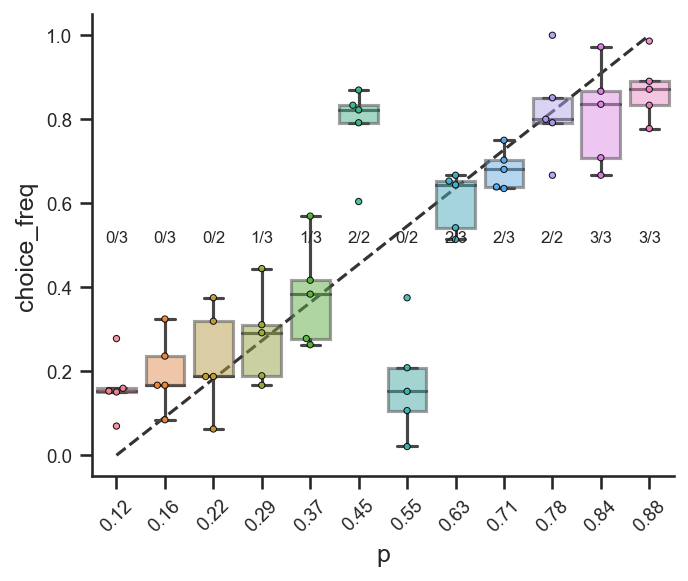

In [5]:
# plot y as choice frequency for each p
# plot x as p
# plot size as N (number of trials with p)

d_freq = []
for pid in df.id.unique():
    ddf = df[(df.id == pid)]
    for p1 in pp:
        n_p1 = ((ddf.p1 == p1) | (ddf.p2 == p1)).sum()
        d_freq.append(
            {
             'p': p1,
             'choice_freq': ((ddf.p1 == p1) & (ddf.choice == 1) | (ddf.p2 == p1) & (ddf.choice == 2)).sum() / n_p1,
             'N': n_p1,
            }
        )

d_freq = pd.DataFrame(d_freq)

plt.figure(figsize=(5, 4), dpi=150)
sns.boxplot(x='p', y='choice_freq', data=d_freq, showfliers=False, boxprops=dict(alpha=0.5), zorder=-1)   

sns.swarmplot(x='p', y='choice_freq',data=d_freq, alpha=0.9, size=3, zorder=1, edgecolor='black', linewidth=0.5)

# plot identity line
plt.plot([0, 11], [0, 1], color='black', linestyle='--', zorder=-10, alpha=0.8)
sns.despine()
plt.tick_params(axis='x', rotation=45)
# plot text for N on top of bars
# for i in range(d_freq.N
    # plt.text(i, d_freq.choice_freq[i], d_freq.N[i], ha='center', va='bottom')
pairs = set(map(tuple, (np.array([df.p1, df.p2]).T)))
pairs = sorted(pairs, key=lambda x: abs(x[0] - x[1]))

count = 0
for p in pp:
    # (a) plot text for N p appears in a pair
    # (b) plot N for N p appears in a pair and is best response
    # must be a/b
    a = sum([p in pair for pair in pairs])
    b = sum([(p in pair) and (p == max(pair)) for pair in pairs])
    plt.text(count, 0.5, f'{b}/{a}', ha='center', va='bottom', fontsize=8)
    count += 1

(-0.1, 1.1)

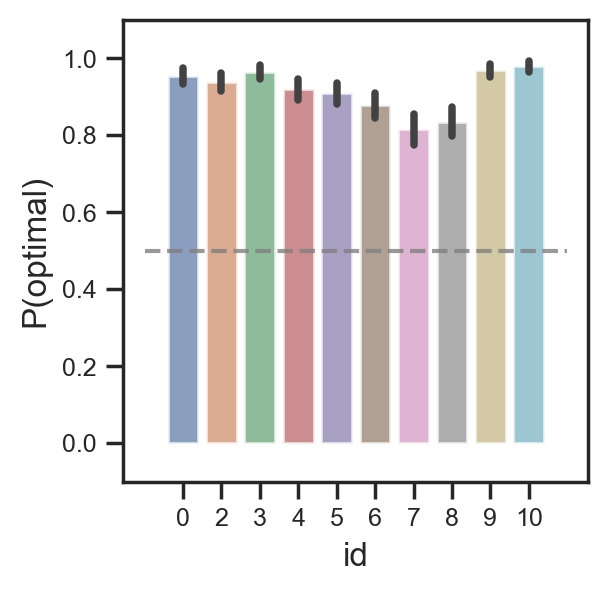

In [11]:
import seaborn as sns


sns.set(rc={'figure.figsize':(3,3), 'figure.dpi': 200, 'xtick.labelsize': 9, 'ytick.labelsize': 9})
sns.set_style('ticks')
sns.barplot(x='id', y='correct',  data=df, alpha=.7)
plt.plot([-1, df.id.nunique()], [0.5, 0.5], color='grey', linestyle='--', zorder=10, alpha=0.8)
plt.ylabel('P(optimal)')
plt.ylim(-0.1, 1.1)


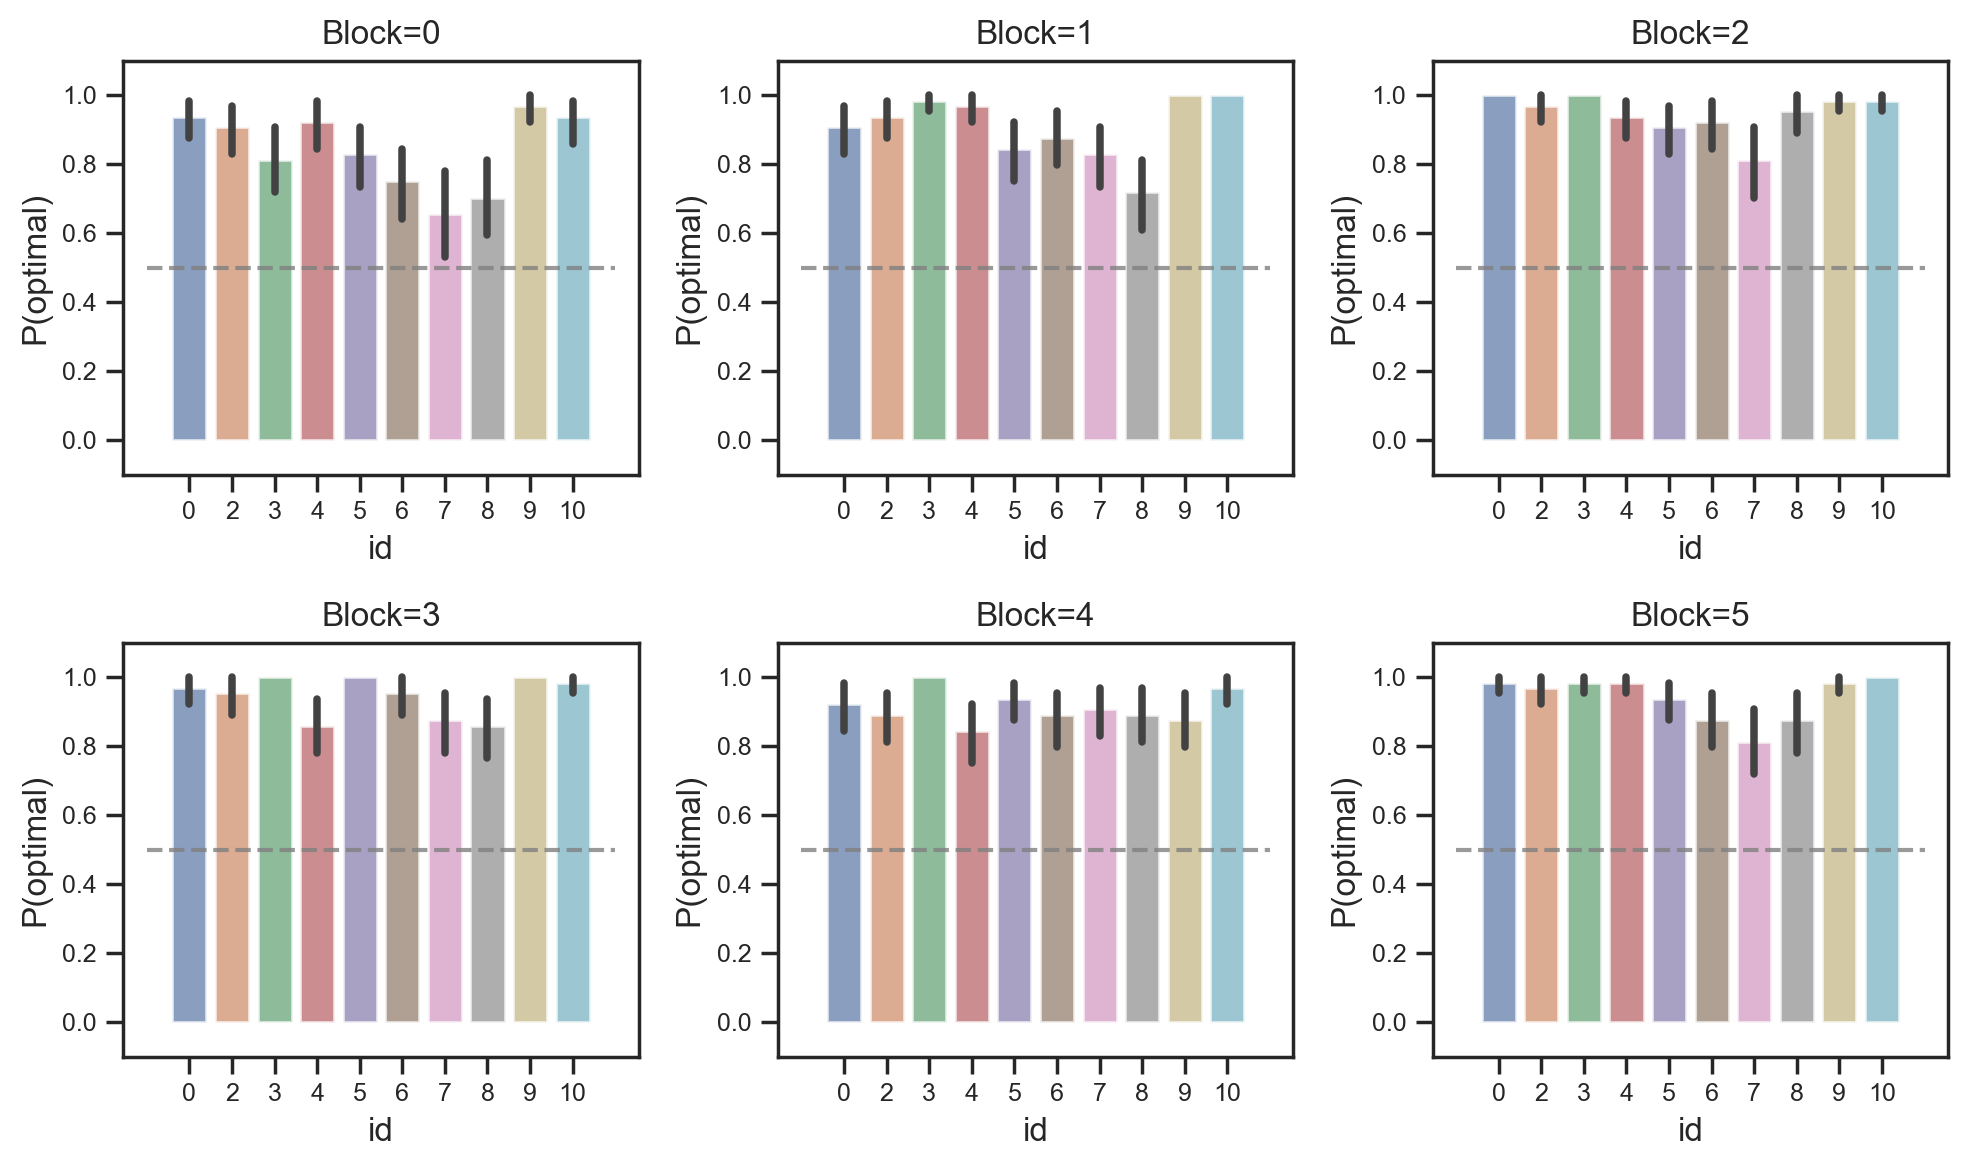

In [12]:
sns.set(rc={'figure.figsize':(10,6), 'figure.dpi': 200, 'xtick.labelsize': 9, 'ytick.labelsize': 9})
sns.set_style('ticks')

for session in df.session.unique():
    plt.subplot(2, 3, session+1)
    ddf = df[df.session == session]
    sns.barplot(x='id', y='correct', data=ddf, alpha=.7)
    plt.plot([-1, ddf.id.nunique()], [0.5, 0.5], color='grey', linestyle='--', zorder=10, alpha=0.8)
    plt.ylabel('P(optimal)')
    plt.title(f'Block={session}')
    plt.ylim(-.1, 1.1)

plt.tight_layout()

In [7]:
# exclude bad participants
df = df[df.id != 1]

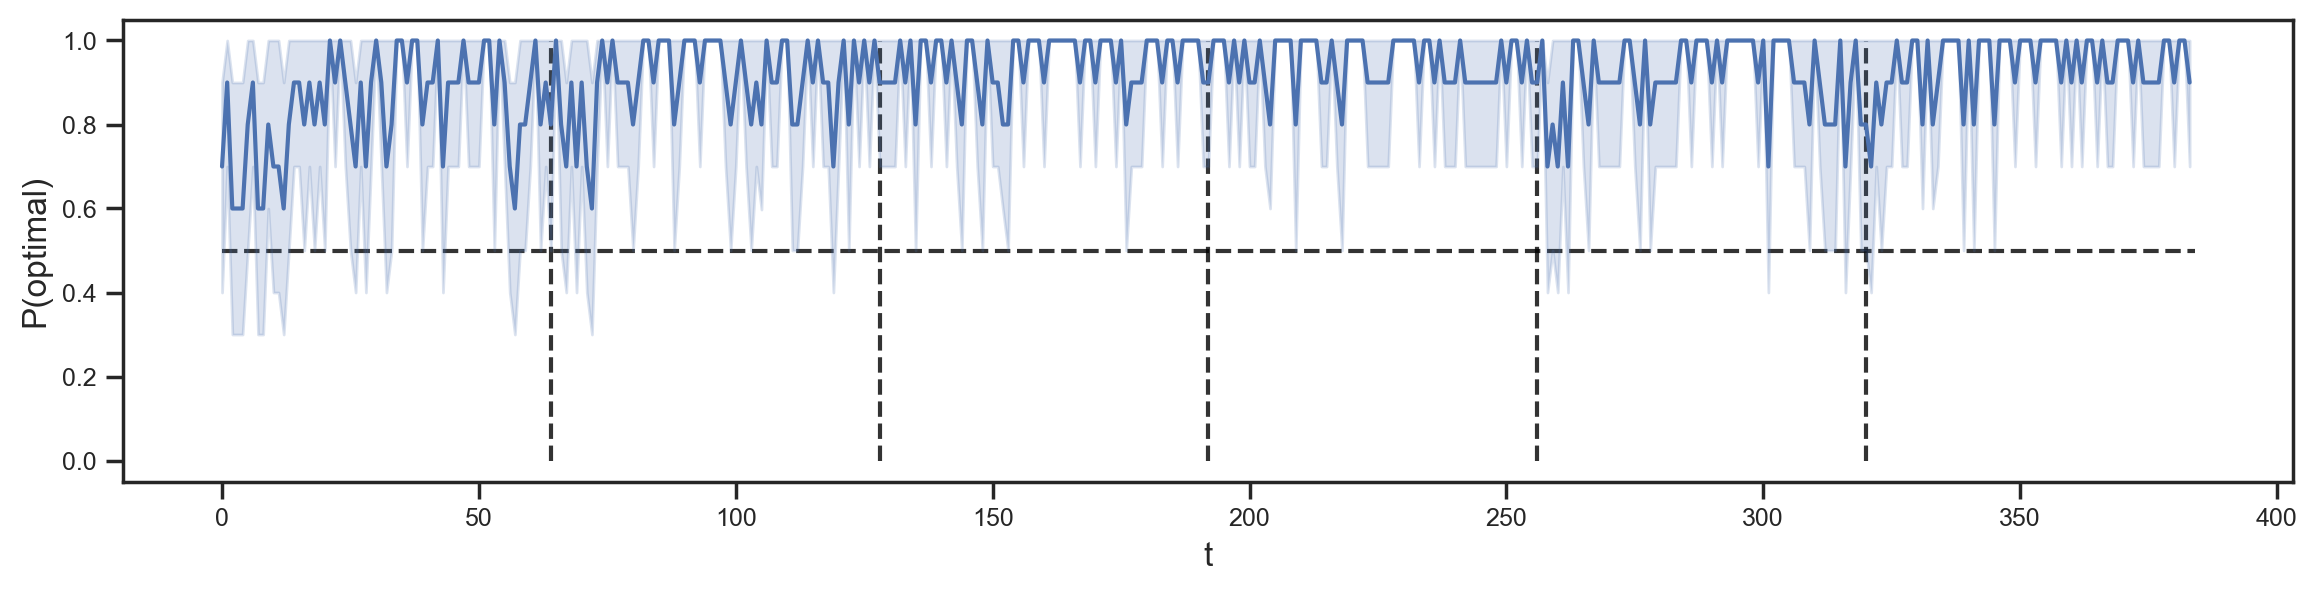

In [10]:
df2 = df.copy()
df2['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)
# there are 6 sessions with 64 trials per session
# we want to plot the learning curve for the 384 trials in total
df2['t'] = (df2.t.max()+1) * df2.session + df2.t
# check for each trial we have the correct session
assert df2[df2.session==0].t.isin(range(0, 64)).all()
assert df2[df2.session==1].t.isin(range(64, 128)).all()
assert df2[df2.session==2].t.isin(range(128, 192)).all()
assert df2[df2.session==3].t.isin(range(192, 256)).all()
assert df2[df2.session==4].t.isin(range(256, 320)).all()
assert df2[df2.session==5].t.isin(range(320, 384)).all()

sns.set(rc={'figure.figsize':(14,3), 'figure.dpi': 200, 'xtick.labelsize': 9, 'ytick.labelsize': 9})
sns.set_style('ticks')
sns.lineplot(x='t', y='correct', data=df2)
plt.ylabel('P(optimal)')
plt.plot([0, 384], [0.5, 0.5], color='black', linestyle='--', zorder=-10, alpha=0.8)
# plt.xlim(0, )
# sns.scatterplot(x='p', y='correct', size='N', hue='N', data=df.groupby('p').mean().reset_index(), palette='crest')
# plot dootted line every 64 trials
for i in range(64, 384, 64):
    plt.plot([i, i], [0, 1], color='black', linestyle='--', zorder=-10, alpha=0.8)

C:\Users\garciaba\AppData\Local\Temp\ipykernel_3348\4134657726.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_3348\4134657726.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = fit.pvalues[1]
c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                correct   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     5.690
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0442
Time:                        15:34:48   Log-Likelihood:                 20.310
No. Observations:                  10   AIC:                            -36.62
Df Residuals:                       8   BIC:                            -36.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8707      0.024     35.827      0.000       0.815       0.927
uncertainty     0.1279      0.054      2.385      0.044       0.004       0.252
==============================================================================
Omnibus:                        3.898   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                1.463
Skew:                          -0.927   Prob(JB):                        0.481
Kurtosis:                       3.272   Cond. No.                         5.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

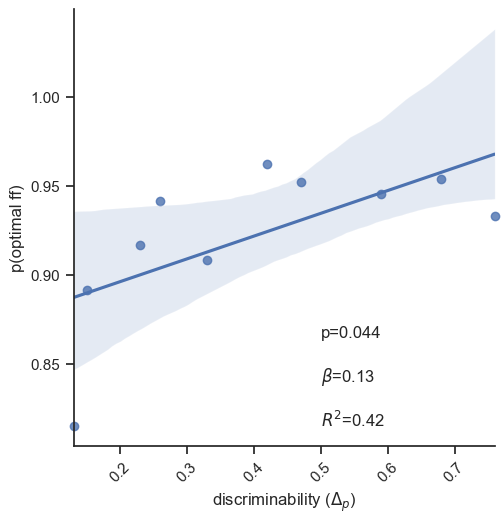

In [14]:
# df2 = df[df.session==0]

df2 = df.copy()
# df2 = df2[df2.session.isin([0, 1, 2])]
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)

df2 = df2.filter(['uncertainty', 'correct']).groupby(['uncertainty'], as_index=False).mean()
# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(3,3), 'figure.dpi': 100})
sns.set_style('ticks')
sns.lmplot(x='uncertainty', y='correct', data=df2, palette='viridis', scatter=dict(zorder=1000), scatter_kws={'clip_on': False})
# plot R2
import statsmodels.formula.api as smf
plt.xlabel('discriminability ($\\Delta_p$)')
plt.ylabel('p(optimal ff)')
fit = smf.ols('correct ~ uncertainty', data=df2).fit()
beta = fit.params[1]
pvalue = fit.pvalues[1]
r = fit.rsquared
plt.xticks(rotation=45)
plt.text(0.5, df2.correct.min(), f'$R^2$={r:.2f}', fontsize=12)
plt.text(0.5, df2.correct.min()+.025, f'$\\beta$={beta:.2f}', fontsize=12)
plt.text(0.5, df2.correct.min()+.05, f'p={pvalue:.3f}', fontsize=12)
# plt.xticks(df2.uncertainty.unique())
# sns.despine(trim=True)
# plt.ylim(-0.1, 1.1)
# print(means)
fit.summary()

In [95]:
df['correct'] = df['correct'].astype(int)
df2 = df.copy()
df2 = df2[df2.session.isin([0, 1, 2])]
smf.logit('correct ~ uncertainty', data=df2).fit().summary()

# sns.lmplot(x='uncertainty', y='correct',
# data=df, palette='viridis', scatter_kws={'clip_on': False}, logistic=True)

Optimization terminated successfully.
         Current function value: 0.325924
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                correct   No. Observations:                 1920
Model:                          Logit   Df Residuals:                     1918
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                0.007849
Time:                        18:01:14   Log-Likelihood:                -625.77
converged:                       True   LL-Null:                       -630.73
Covariance Type:            nonrobust   LLR p-value:                  0.001651
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7448      0.154     11.332      0.000       1.443       2.047
uncertainty     1.2400      0.403      3.075      0.002       0.450       2.030
===============================================================================
"""

C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\2148182697.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\2148182697.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = fit.pvalues[1]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                correct   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.583
Date:                Thu, 07 Mar 2024   Prob (F-statistic):             0.0613
Time:                        18:01:16   Log-Likelihood:                 89.901
No. Observations:                 100   AIC:                            -175.8
Df Residuals:                      98   BIC:                            -170.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8680      0.022     40.299      0.000       0.825       0.911
uncertainty     0.0900      0.048      1.893      0.061      -0.004       0.184
==============================================================================
Omnibus:                       28.880   Durbin-Watson:                   1.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.379
Skew:                          -1.253   Prob(JB):                     5.15e-11
Kurtosis:                       5.257   Cond. No.                         5.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

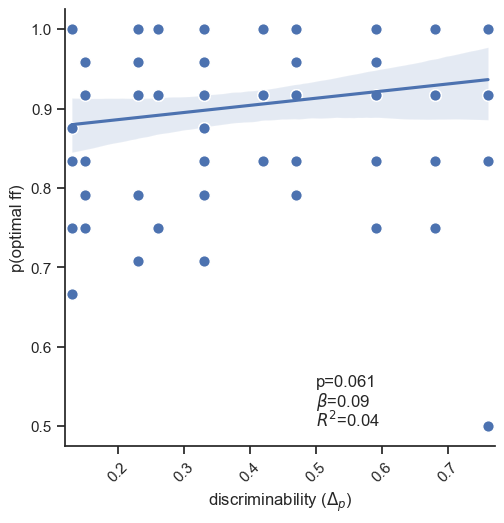

In [96]:
# df2 = df[df.session==0]

df2 = df.copy()
df2 = df2[df2.session.isin([0, 1, 2])]
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)

df2 = df2.filter(['prolificID', 'uncertainty', 'correct']).groupby(['prolificID', 'uncertainty'], as_index=False).mean()

sns.set(rc={'figure.figsize':(3,3), 'figure.dpi': 100})
sns.set_style('ticks')
sns.lmplot(x='uncertainty', y='correct', data=df2, palette='viridis', scatter_kws={'clip_on': False, 'zorder': 2, 'alpha': 1,
                                                                                    'edgecolor': 'w', 'linewidth': 1.01, 's': 70})# plot R2
import statsmodels.formula.api as smf
plt.xlabel('discriminability ($\\Delta_p$)')
plt.ylabel('p(optimal ff)')
plt.xlim(min(df2.uncertainty)-0.01, max(df2.uncertainty)+.01)
fit = smf.ols('correct ~ uncertainty', data=df2).fit()
beta = fit.params[1]
pvalue = fit.pvalues[1]
r = fit.rsquared
plt.xticks(rotation=45)
plt.text(0.5, df2.correct.min(), f'$R^2$={r:.2f}', fontsize=12)
plt.text(0.5, df2.correct.min()+.025, f'$\\beta$={beta:.2f}', fontsize=12)
plt.text(0.5, df2.correct.min()+.05, f'p={pvalue:.3f}', fontsize=12)
# plt.xticks(df2.uncertainty.unique())
# sns.despine(trim=True)
# plt.ylim(-0.1, 1.1)
# print(means)
fit.summary()

C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\148547190.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\148547190.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = fit.pvalues[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\148547190.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppD

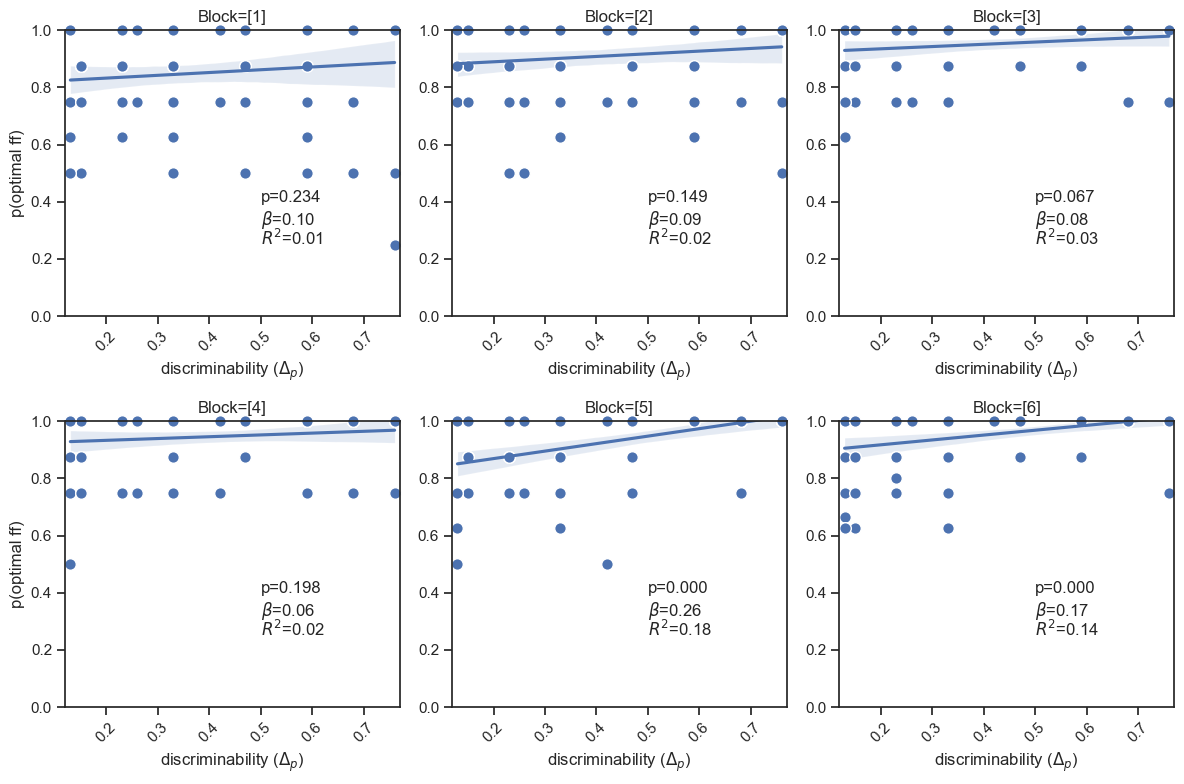

In [97]:
import statsmodels.formula.api as smf


df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)


sns.set(rc={'figure.figsize':(12,8), 'figure.dpi': 100})
sns.set_style('ticks')
blocklist=[]
for block in range(6):
    ax = plt.subplot(2, 3, block+1)
    ax.clear()
    blocklist = []
    blocklist.append(block)
    dff = df[df.session.isin(blocklist)] 
    dff = dff.filter(['prolificID', 'uncertainty', 'correct', 'session']).groupby(['prolificID', 'uncertainty'], as_index=False).mean()
    sns.regplot(ax=ax, x='uncertainty', y='correct', data=dff, scatter_kws={'clip_on': False, 'zorder': 2, 'alpha': 1,
                                                                    'edgecolor': 'w', 'linewidth': 1.01, 's': 70})# plot R2
    plt.ylim(0, 1)
    
    plt.ylabel('')
    if block in [0, 3]:
        plt.ylabel('p(optimal ff)')
    plt.xlabel('discriminability ($\\Delta_p$)')
    plt.xlim(min(df2.uncertainty)-0.01, max(df2.uncertainty)+.01)
    fit = smf.ols('correct ~ uncertainty', data=dff).fit()
    beta = fit.params[1]
    pvalue = fit.pvalues[1]
    r = fit.rsquared
    plt.xticks(rotation=45)
    plt.text(0.5, 0.25, f'$R^2$={r:.2f}', fontsize=12)
    plt.text(0.5, 0.32, f'$\\beta$={beta:.2f}', fontsize=12)
    plt.text(0.5, 0.4, f'p={pvalue:.3f}', fontsize=12)
    plt.title(f'Block={[i+1 for i in blocklist]}')
# plt.xticks(df2.uncertainty.unique())
# sns.despine(trim=True)
# plt.ylim(-0.1, 1.1)
# print(means)
    fit.summary()

plt.tight_layout()

C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\3725458093.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\3725458093.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = fit.pvalues[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\3725458093.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\A

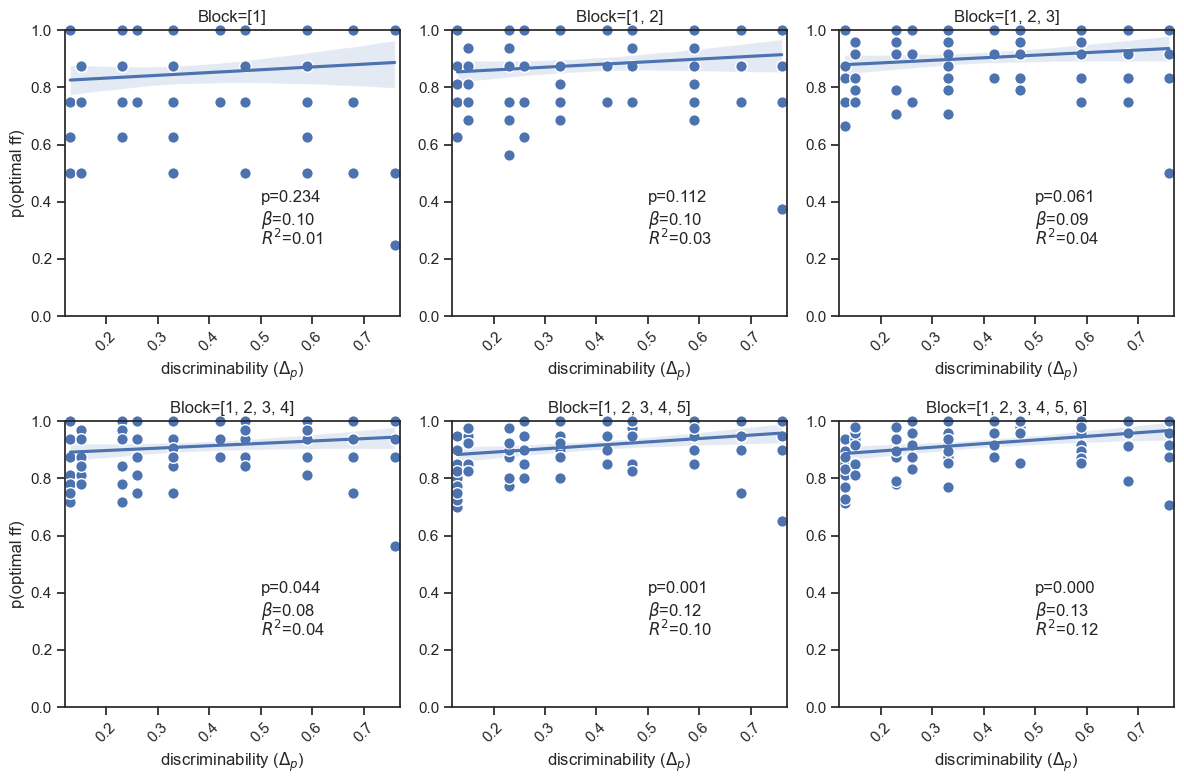

In [98]:
# df2 = df[df.session==0]

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)


sns.set(rc={'figure.figsize':(12,8), 'figure.dpi': 100})
sns.set_style('ticks')
blocklist=[]
for block in range(6):
    ax = plt.subplot(2, 3, block+1)
    ax.clear()
    # blocklist = []
    blocklist.append(block)
    dff = df[df.session.isin(blocklist)] 
    dff = dff.filter(['prolificID', 'uncertainty', 'correct', 'session']).groupby(['uncertainty','prolificID'], as_index=False).mean()
    sns.regplot(ax=ax, x='uncertainty', y='correct', data=dff, scatter_kws={'clip_on': False, 'zorder': 2, 'alpha': 1,
                                                                    'edgecolor': 'w', 'linewidth': 1.01, 's': 70})# plot R2
    plt.ylim(0, 1)
    
    import statsmodels.formula.api as smf
    plt.ylabel('')
    if block in [0, 3]:
        plt.ylabel('p(optimal ff)')
    plt.xlabel('discriminability ($\\Delta_p$)')
    plt.xlim(min(df2.uncertainty)-0.01, max(df2.uncertainty)+.01)
    fit = smf.ols('correct ~ uncertainty', data=dff).fit()
    beta = fit.params[1]
    pvalue = fit.pvalues[1]
    r = fit.rsquared
    plt.xticks(rotation=45)
    plt.text(0.5, 0.25, f'$R^2$={r:.2f}', fontsize=12)
    plt.text(0.5, 0.32, f'$\\beta$={beta:.2f}', fontsize=12)
    plt.text(0.5, 0.4, f'p={pvalue:.3f}', fontsize=12)
    plt.title(f'Block={[i+1 for i in blocklist]}')
# plt.xticks(df2.uncertainty.unique())
# sns.despine(trim=True)
# plt.ylim(-0.1, 1.1)
# print(means)
    fit.summary()

plt.tight_layout()

C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\1867073154.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\1867073154.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = fit.pvalues[1]
c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\1867073154.py:34: FutureWarning: Series.__getitem__ treating keys as positions is depre

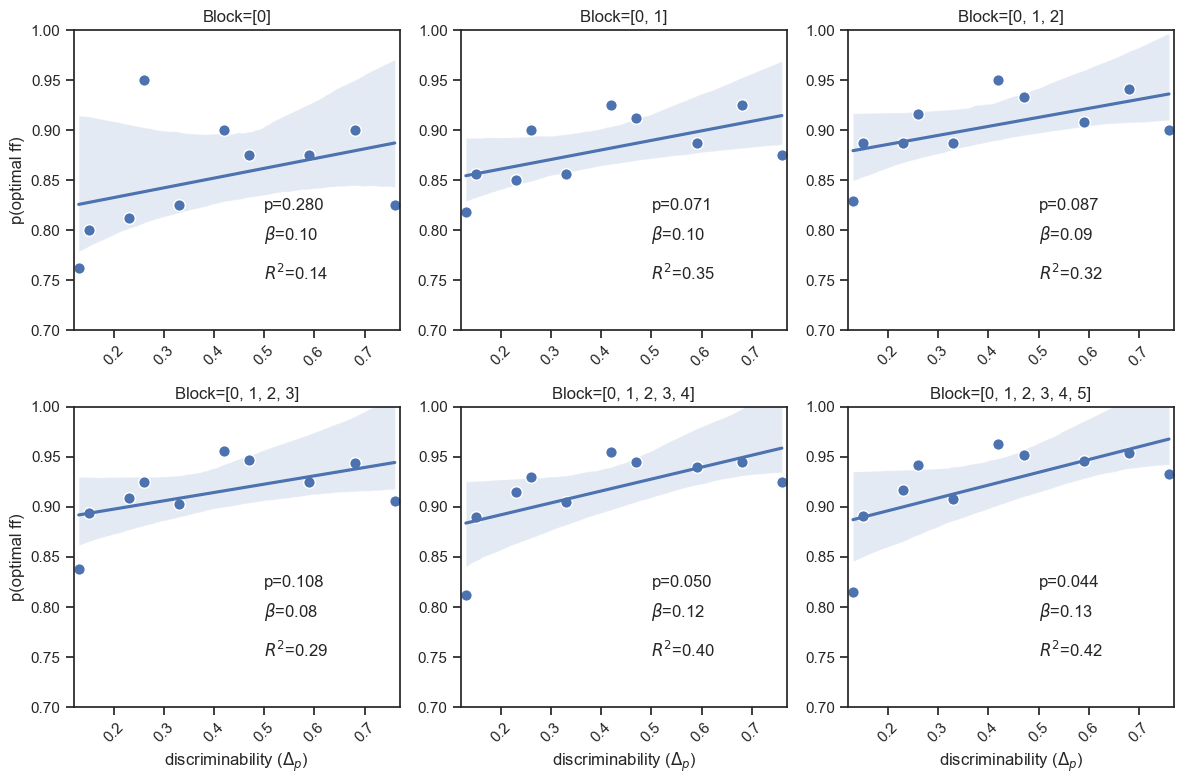

In [99]:
# df2 = df[df.session==0]

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)

df2 = df2.filter(['uncertainty', 'correct', 'session']).groupby(['uncertainty'], as_index=False).mean()

sns.set(rc={'figure.figsize':(12,8), 'figure.dpi': 100})
sns.set_style('ticks')
blocklist=[]
ax=[]
for block in range(6):
    blocklist.append(block)
    ax_ = plt.subplot(2, 3, block+1)
    ax.append(ax_)
    dff = df[df.session.isin(blocklist)] 
    dff = dff.filter(['uncertainty', 'correct', 'session']).groupby(['uncertainty'], as_index=False).mean()
    sns.regplot(ax=ax[block], x='uncertainty', y='correct', data=dff, scatter_kws={'clip_on': False, 'zorder': 2, 'alpha': 1,
                                                                    'edgecolor': 'w', 'linewidth': 1.01, 's': 70})# plot R2
    plt.ylim(.7, 1)
    import statsmodels.formula.api as smf

    plt.ylabel('')
    if block in [0, 3]:
        plt.ylabel('p(optimal ff)')

    plt.xlabel('')
    if block in [3, 4, 5]:
        plt.xlabel('discriminability ($\\Delta_p$)')

    plt.xlim(min(df2.uncertainty)-0.01, max(df2.uncertainty)+.01)
    fit = smf.ols('correct ~ uncertainty', data=dff).fit()
    beta = fit.params[1]
    pvalue = fit.pvalues[1]
    r = fit.rsquared
    plt.xticks(rotation=45)
    plt.text(0.5, 0.75, f'$R^2$={r:.2f}', fontsize=12)
    plt.text(0.5, 0.79, f'$\\beta$={beta:.2f}', fontsize=12)
    plt.text(0.5, 0.82, f'p={pvalue:.3f}', fontsize=12)
    plt.title(f'Block={blocklist}')
# plt.xticks(df2.uncertainty.unique())
# sns.despine(trim=True)
# plt.ylim(-0.1, 1.1)
# print(means)
    fit.summary()

plt.tight_layout()

C:\Users\garciaba\AppData\Local\Temp\ipykernel_3348\285175838.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_3348\285175838.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = fit.pvalues[1]
c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fireTime   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     9.647
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0145
Time:                        16:07:59   Log-Likelihood:                 19.818
No. Observations:                  10   AIC:                            -35.64
Df Residuals:                       8   BIC:                            -35.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8558      0.026     33.523      0.000       0.797       0.915
uncertainty    -0.1750      0.056     -3.106      0.015      -0.305      -0.045
==============================================================================
Omnibus:                        0.121   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.315
Skew:                          -0.158   Prob(JB):                        0.854
Kurtosis:                       2.191   Cond. No.                         5.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

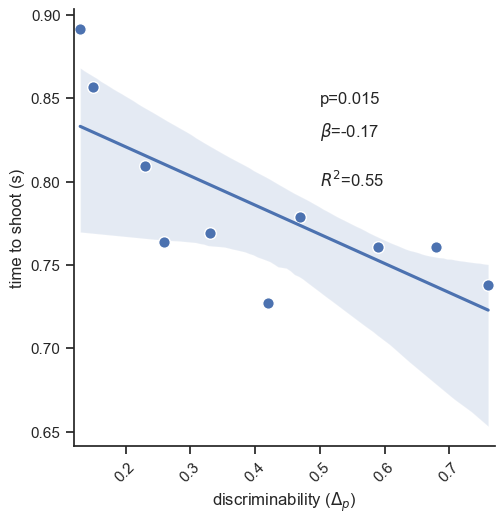

In [29]:
# df2 = df[df.session==0]

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)

df2 = df2.filter(['uncertainty', 'fireTime']).groupby(['uncertainty'], as_index=False).mean()

sns.set(rc={'figure.figsize':(3,3), 'figure.dpi': 100})
sns.set_style('ticks')
sns.lmplot(x='uncertainty', y='fireTime', data=df2, palette='viridis', scatter_kws={'clip_on': False, 'zorder': 2, 'alpha': 1,
                                                                                    'edgecolor': 'w', 'linewidth': 1.01, 's': 70})# plot R2
import statsmodels.formula.api as smf
plt.xlabel('discriminability ($\\Delta_p$)')
plt.ylabel('time to shoot (s)')
plt.xlim(min(df2.uncertainty)-0.01, max(df2.uncertainty)+.01)
fit = smf.ols('fireTime ~ uncertainty', data=df2).fit()
beta = fit.params[1]
pvalue = fit.pvalues[1]
r = fit.rsquared
plt.xticks(rotation=45)

plt.text(0.5, df2.fireTime.min()+.07, f'$R^2$={r:.2f}', fontsize=12)
plt.text(0.5, df2.fireTime.min()+.1, f'$\\beta$={beta:.2f}', fontsize=12)
plt.text(0.5, df2.fireTime.min()+.12, f'p={pvalue:.3f}', fontsize=12)
# plt.xticks(df2.uncertainty.unique())
# sns.despine(trim=True)
# plt.ylim(-0.1, 1.1)
# print(means)
fit.summary()

C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\2720029515.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\2720029515.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = fit.pvalues[1]
c:\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\garciaba\AppData\Local\Temp\ipykernel_26016\2720029515.py:29: FutureWarning: Series.__getitem__ treating keys as positions is depre

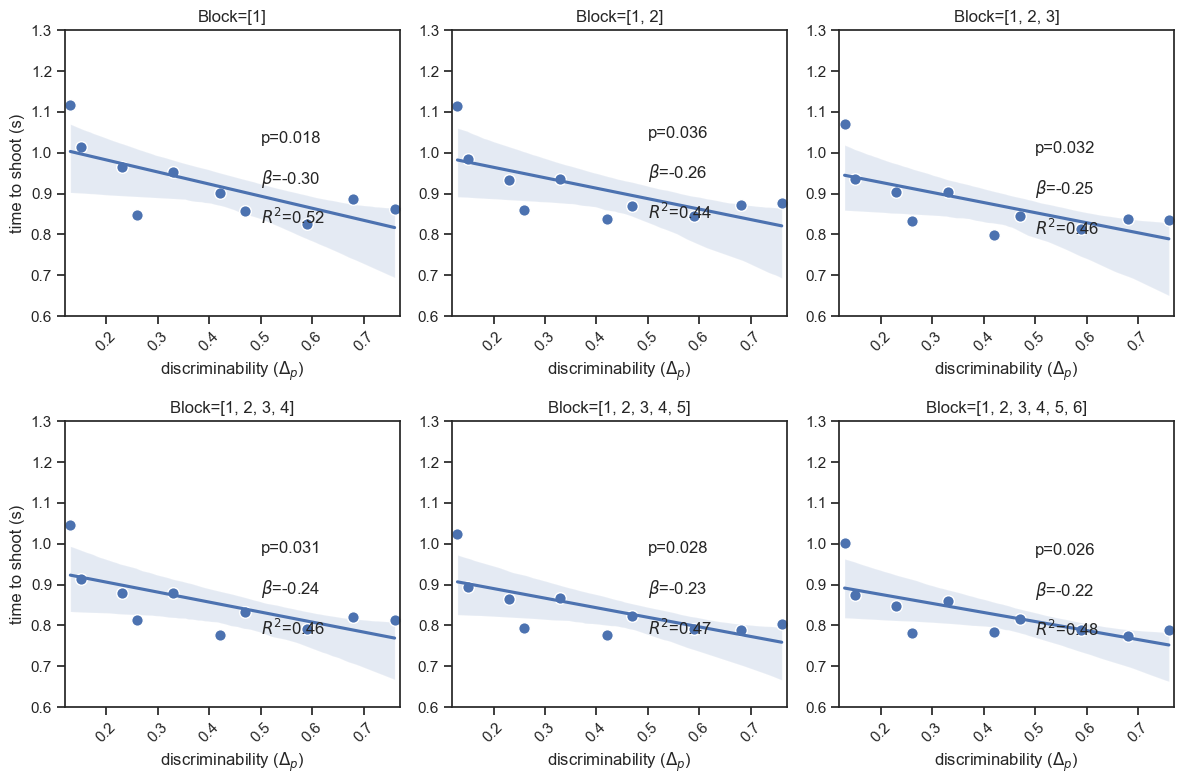

In [38]:
# df2 = df[df.session==0]

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)


sns.set(rc={'figure.figsize':(12,8), 'figure.dpi': 100})
sns.set_style('ticks')
blocklist=[]
for block in range(6):
    ax = plt.subplot(2, 3, block+1)
    ax.clear()
    # blocklist = []
    blocklist.append(block)
    dff = df[df.session.isin(blocklist)] 
    dff = dff.filter(['uncertainty', 'fireTime', 'session']).groupby(['uncertainty'], as_index=False).mean()
    sns.regplot(ax=ax, x='uncertainty', y='fireTime', data=dff, scatter_kws={'clip_on': False, 'zorder': 2, 'alpha': 1,
                                                                    'edgecolor': 'w', 'linewidth': 1.01, 's': 70})# plot R2
    plt.ylim(.6, 1.3)
    
    import statsmodels.formula.api as smf
    plt.ylabel('')
    if block in [0, 3]:
        plt.ylabel('time to shoot (s)')
    plt.xlabel('discriminability ($\\Delta_p$)')
    plt.xlim(min(df2.uncertainty)-0.01, max(df2.uncertainty)+.01)
    fit = smf.ols('fireTime ~ uncertainty', data=dff).fit()
    beta = fit.params[1]
    pvalue = fit.pvalues[1]
    r = fit.rsquared
    plt.xticks(rotation=45)
    plt.text(0.5, dff.fireTime.min(), f'$R^2$={r:.2f}', fontsize=12)
    plt.text(0.5, dff.fireTime.min()+.1, f'$\\beta$={beta:.2f}', fontsize=12)
    plt.text(0.5, dff.fireTime.min()+.2, f'p={pvalue:.3f}', fontsize=12)
    plt.title(f'Block={[i+1 for i in blocklist]}')
# plt.xticks(df2.uncertainty.unique())
# sns.despine(trim=True)
# plt.ylim(-0.1, 1.1)
# print(means)
    fit.summary()

plt.tight_layout()

C:\Users\garciaba\AppData\Local\Temp\ipykernel_10412\4128015348.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = fit.params[1]
C:\Users\garciaba\AppData\Local\Temp\ipykernel_10412\4128015348.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pvalue = fit.pvalues[1]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fireTime   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9074
Date:                Mon, 12 Feb 2024   Prob (F-statistic):              0.346
Time:                        15:58:13   Log-Likelihood:                 6.5947
No. Observations:                  50   AIC:                            -9.189
Df Residuals:                      48   BIC:                            -5.365
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9005      0.060     15.087      0.000       0.780       1.020
uncertainty    -0.1271      0.133     -0.953      0.346      -0.395       0.141
==============================================================================
Omnibus:                        2.022   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.770
Skew:                           0.336   Prob(JB):                        0.413
Kurtosis:                       2.370   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

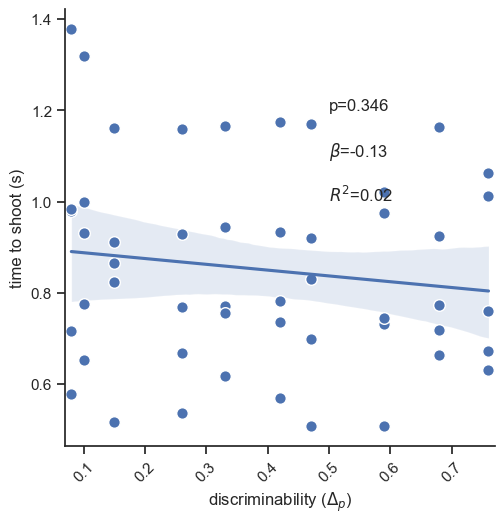

In [36]:
# df2 = df[df.session==0]

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)

df2 = df2.filter(['uncertainty', 'fireTime', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()

sns.set(rc={'figure.figsize':(3,3), 'figure.dpi': 100})
sns.set_style('ticks')
sns.lmplot(x='uncertainty', y='fireTime', data=df2, palette='viridis', scatter_kws={'clip_on': False, 'zorder': 2, 'alpha': 1,
                                                                                    'edgecolor': 'w', 'linewidth': 1.01, 's': 70})# plot R2
import statsmodels.formula.api as smf
plt.xlabel('discriminability ($\\Delta_p$)')
plt.ylabel('time to shoot (s)')
plt.xlim(min(df2.uncertainty)-0.01, max(df2.uncertainty)+.01)
fit = smf.ols('fireTime ~ uncertainty', data=df2).fit()
beta = fit.params[1]
pvalue = fit.pvalues[1]
r = fit.rsquared
plt.xticks(rotation=45)

plt.text(0.5, 1, f'$R^2$={r:.2f}', fontsize=12)
plt.text(0.5, 1.1, f'$\\beta$={beta:.2f}', fontsize=12)
plt.text(0.5, 1.2, f'p={pvalue:.3f}', fontsize=12)
# plt.xticks(df2.uncertainty.unique())
# sns.despine(trim=True)
# plt.ylim(-0.1, 1.1)
# print(means)
fit.summary()

Text(0, 0.5, 'p(optimal ff)')

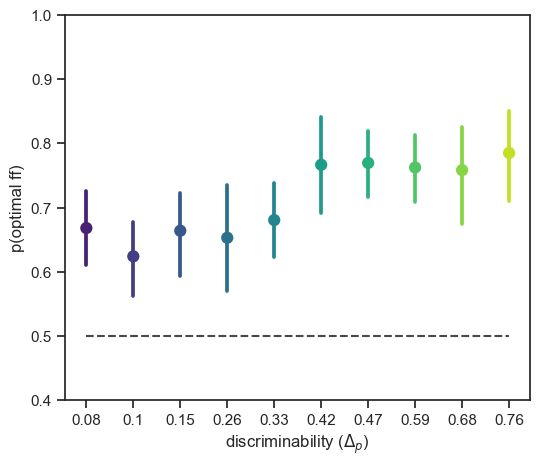

In [85]:

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)
df['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)

df2 = df2.filter(['uncertainty', 'correct', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()
# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(6,5), 'figure.dpi': 100})
sns.set_style('ticks')
ax = sns.pointplot(x='uncertainty', y='correct', data=df, palette='viridis', errorbar='se', zorder=-1)
# plt.setp(ax.collections, alpha=.9) #for the markers
# plt.setp(ax.lines, alpha=.5)       #for the lines
# sns.stripplot(x='uncertainty', y='correct', data=df2, color='lightgray', alpha=0.9, edgecolor='w', zorder=1,lw=2)
plt.plot([0, 9], [0.5, 0.5], color='k', linestyle='--', zorder=-10, alpha=0.8)
plt.ylim(0.4,1)
plt.xlabel('discriminability ($\\Delta_p$)')
plt.ylabel('p(optimal ff)')

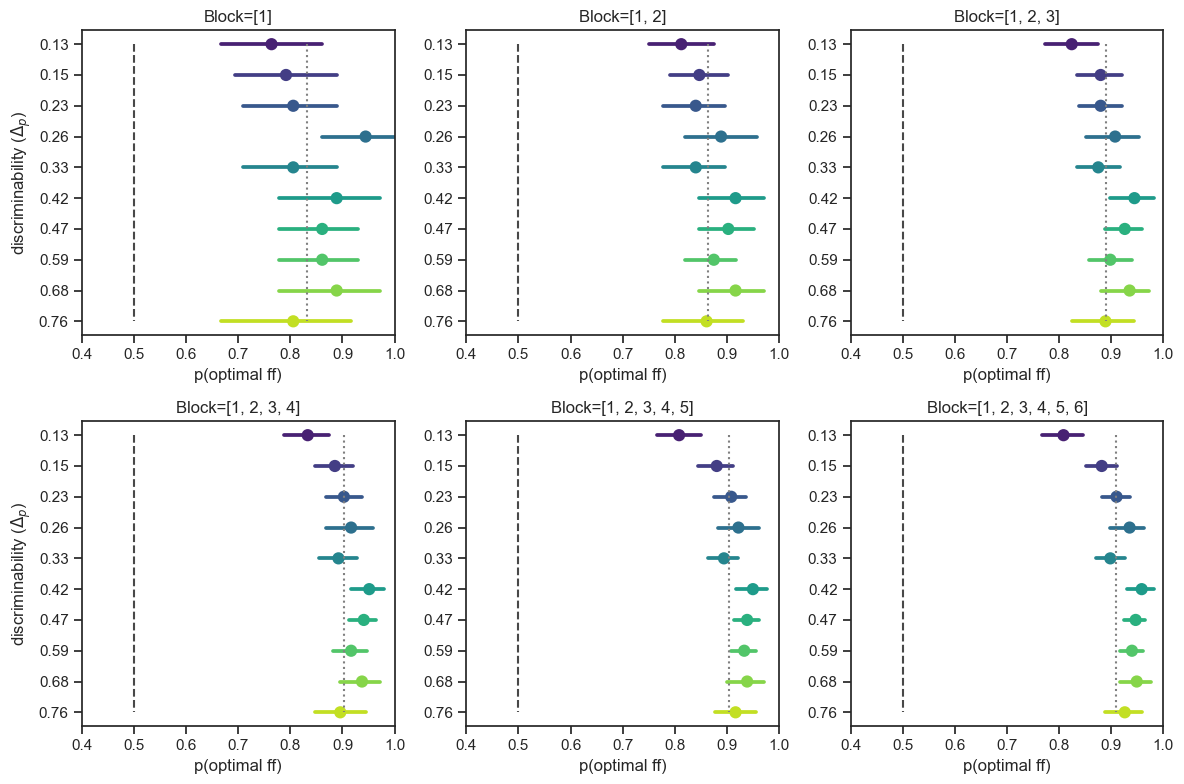

In [69]:

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)
df['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)

df2 = df2.filter(['uncertainty', 'correct', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()
# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(12,8), 'figure.dpi': 100})
blocklist=[]
for block in range(6):
    # blocklist = []
    blocklist.append(block)
    dff = df[df.session.isin(blocklist)]
    sns.set_style('ticks')
    plt.subplot(2, 3, block+1)
    ax = sns.pointplot(x='correct', y='uncertainty', data=dff, palette='viridis', errorbar='se',  zorder=-1, orient='h')
# plt.setp(ax.collections, alpha=.9) #for the markers
# plt.setp(ax.lines, alpha=.5)       #for the lines
# sns.stripplot(x='uncertainty', y='correct', data=df2, color='lightgray', alpha=0.9, edgecolor='w', zorder=1,lw=2)
    plt.plot([0.5, 0.5], [0, 9], color='k', linestyle='--', zorder=-10, alpha=0.8)
    plt.plot([dff.correct.mean(), dff.correct.mean()], [0, 9], ':', color='grey')
    plt.xlim(0.4,1)
    if block in [0, 3]:
        plt.ylabel('discriminability ($\\Delta_p$)')
    # plt.ylabel('discriminability ($\\Delta_p$)')
    else:
        plt.ylabel('')
    plt.xlabel('p(optimal ff)')
    plt.title(f'Block={[i+1 for i in blocklist]}')
plt.tight_layout()
# import pingouin as pg
# df['correct'] = df['correct'].astype(int)
# pg.pairwise_tests(data=df, dv='correct', within='uncertainty', padjust='bonf', subject='prolificID')

c:\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
c:\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
c:\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: divide by zero encountered in _nct

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,uncertainty,0.13,0.15,True,True,-9.922426e+00,3.0,two-sided,0.002178,0.097988,bonf,19.329,-1.355030e+00
1,uncertainty,0.13,0.23,True,True,-3.756285e+00,3.0,two-sided,0.032974,1.000000,bonf,3.158,-2.340039e+00
2,uncertainty,0.13,0.26,True,True,-5.513401e+00,3.0,two-sided,0.011750,0.528739,bonf,6.314,-2.480733e+00
3,uncertainty,0.13,0.33,True,True,-3.068777e+00,3.0,two-sided,0.054615,1.000000,bonf,2.243,-1.604733e+00
4,uncertainty,0.13,0.42,True,True,-5.637345e+00,3.0,two-sided,0.011044,0.496966,bonf,6.581,-1.736816e+00
5,uncertainty,0.13,0.47,True,True,-4.158620e+00,3.0,two-sided,0.025286,1.000000,bonf,3.778,-2.434783e+00
6,uncertainty,0.13,0.59,True,True,-3.962029e+00,3.0,two-sided,0.028716,1.000000,bonf,3.467,-2.608696e+00
7,uncertainty,0.13,0.68,True,True,-3.333847e+00,3.0,two-sided,0.044591,1.000000,bonf,2.574,-2.480733e+00
8,uncertainty,0.13,0.76,True,True,-2.926029e+00,3.0,two-sided,0.061197,1.000000,bonf,2.076,-2.036056e+00
9,uncertainty,0.15,0.23,True,True,-1.477098e+00,3.0,two-sided,0.236154,1.000000,bonf,0.837,-8.695652e-01


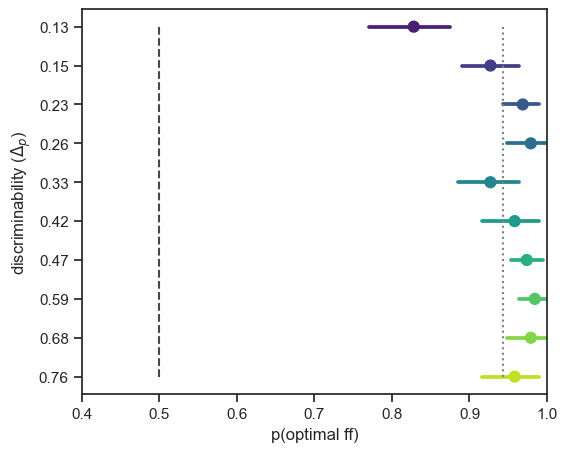

c:\Python312\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [40]:

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)
df['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)

df2 = df2.filter(['uncertainty', 'correct', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()
# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(6,5), 'figure.dpi': 100})
sns.set_style('ticks')
ax = sns.pointplot(x='correct', y='uncertainty', data=df, palette='viridis', errorbar='se', zorder=-1, orient='h')
# plt.setp(ax.collections, alpha=.9) #for the markers
# plt.setp(ax.lines, alpha=.5)       #for the lines
# sns.stripplot(x='uncertainty', y='correct', data=df2, color='lightgray', alpha=0.9, edgecolor='w', zorder=1,lw=2)
plt.plot([0.5, 0.5], [0, 9], color='k', linestyle='--', zorder=-10, alpha=0.8)
plt.plot([df.correct.mean(), df.correct.mean()], [0, 9], ':', color='grey')
plt.xlim(0.4,1)
plt.ylabel('discriminability ($\\Delta_p$)')
plt.xlabel('p(optimal ff)')

import pingouin as pg
df['correct'] = df['correct'].astype(int)
pg.pairwise_tests(data=df, dv='correct', within='uncertainty', padjust='bonf', subject='prolificID')

Text(0.5, 0, 'time to shoot (s)')

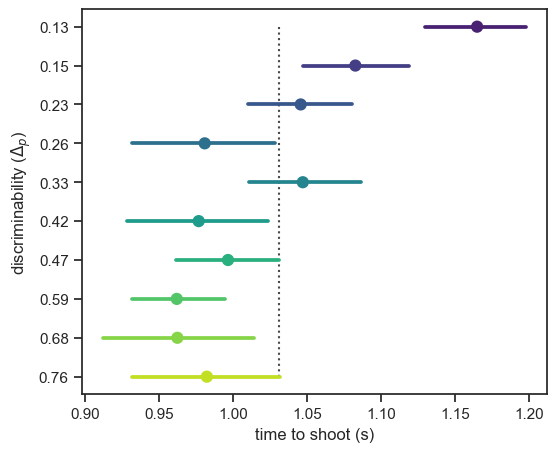

In [70]:

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df2 = df2.filter(['uncertainty', 'correct', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()

# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(6,5), 'figure.dpi': 100})
sns.set_style('ticks')
# palette = sns.color_palette('viridis')
ax = sns.pointplot(x='fireTime', y='uncertainty', data=df, palette='viridis',
                    errorbar='se', zorder=-1, orient='h')
# plt.setp(ax.collections, alpha=.9) #for the markers
# plt.setp(ax.lines, alpha=.5)       #for the lines
# sns.stripplot(x='uncertainty', y='correct', data=df2, color='lightgray', alpha=0.9, edgecolor='w', zorder=1,lw=2)
plt.plot([df.fireTime.mean()]*2, [0, 9], color='k', linestyle=':', zorder=-10, alpha=0.8)
# plt.xlim(0.4,1)
plt.ylabel('discriminability ($\\Delta_p$)')
plt.xlabel('time to shoot (s)')

# pg.pairwise_ttests(data=df, dv='fireTime', within='uncertainty', subject='prolificID', padjust='bonf')

(-0.05, 1.05)

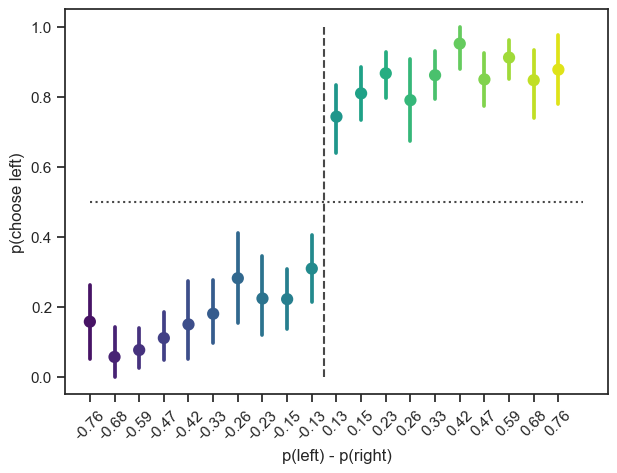

In [30]:
df['delta'] = (df.p1 - df.p2) * df.op1IsLeft + (df.p2 - df.p1) * (1 - df.op1IsLeft)
df['delta'] = df['delta'].round(2)
df['p(choose left)'] = (df.choice == 1) * df.op1IsLeft + (df.choice == 2) * (1 - df.op1IsLeft)

sns.set(rc={'figure.figsize':(7,5), 'figure.dpi': 100, 'font.size': 20})
sns.set_style('ticks')
sns.pointplot(x='delta', y='p(choose left)', data=df[df.session.isin(range(4))], palette='viridis', errorbar='se')
plt.xticks(rotation=45)
# plt.ylabel('P(optimal)')
plt.xlabel('p(left) - p(right)')
plt.plot([0, 20], [0.5, 0.5], color='k', linestyle=':', zorder=-10, alpha=0.8)
# plot a vertical line at 0
plt.plot([9.5, 9.5], [0, 1], color='k', linestyle='--', zorder=-10, alpha=0.8)
plt.ylim(-0.05,1.05)

# rightpart leftmost option is optimal
# left part rightmost option is optimal
# plt.text(5, 0.2, 'right optimal', fontsize=12)
# plt.text(15, 0.2, 'left optimal', fontsize=12)


In [22]:
import numpy as np
pairs = [
    [0.12, 0.88], 
    [0.12, 0.71],
    [0.12, 0.45],
    [0.12, 0.22],
    [0.16, 0.84],
    [0.16, 0.63],
    [0.22, 0.37],
    [0.29, 0.88],
    [0.29, 0.71],
    [0.37, 0.84],
    [0.37, 0.63],
    [0.37, 0.45],
    [0.55, 0.88],
    [0.55, 0.63],
    [0.63, 0.78],
    [0.78, 0.88]
]

pairs = list(map(list, np.array([df.p1.values, df.p2.values]).T))
pairs = set(map(tuple, pairs))
# sort by delta
pairs = sorted(pairs, key=lambda x: abs(x[0] - x[1]))

# compute the distance between each pair
distances = []
for pair in pairs:
    d = (pair[0] - pair[1])
    distances.append(d)
    
np.unique(np.abs(distances))

array([0.13, 0.13, 0.15, 0.15, 0.23, 0.23, 0.26, 0.33, 0.33, 0.42, 0.47,
       0.59, 0.59, 0.68, 0.76])

In [3]:
pairs

[(0.16, 0.29),
 (0.71, 0.84),
 (0.22, 0.37),
 (0.63, 0.78),
 (0.55, 0.78),
 (0.22, 0.45),
 (0.37, 0.63),
 (0.55, 0.88),
 (0.12, 0.45),
 (0.29, 0.71),
 (0.16, 0.63),
 (0.37, 0.84),
 (0.12, 0.71),
 (0.29, 0.88),
 (0.16, 0.84),
 (0.12, 0.88)]

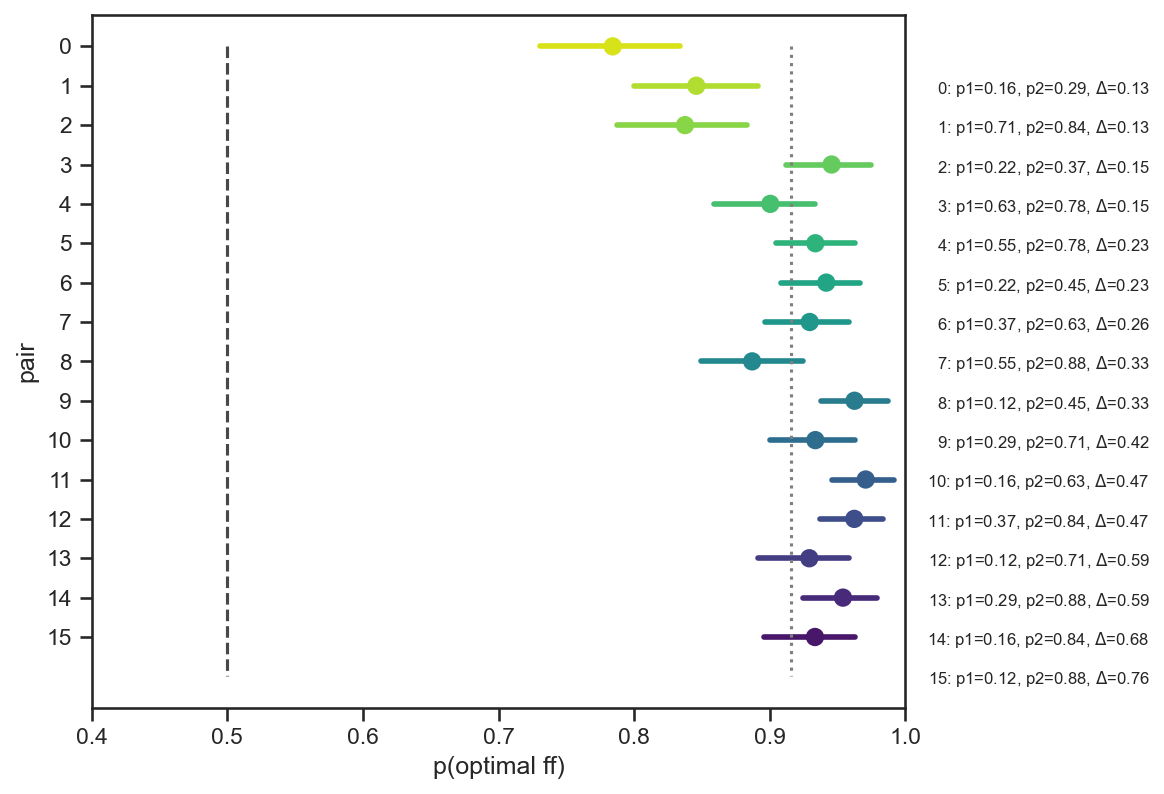

In [104]:
df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)
df['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)

df2 = df2.filter(['uncertainty', 'correct', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()
# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(7,6), 'figure.dpi': 150})
palette = sns.color_palette('viridis', n_colors=len(pairs))[::-1]
sns.set_style('ticks')

sns.pointplot(x='correct', y='block', data=df, palette=palette,errorbar='se', zorder=-1, orient='h')
plt.plot([0.5, 0.5], [0, 16], color='k', linestyle='--', zorder=-10, alpha=0.8)
plt.xlim(0.4,1)

plt.ylabel('pair')
plt.xlabel('p(optimal ff)')

plt.plot([df.correct.mean(), df.correct.mean()], [0,16], ':', color='grey')

# for each ytick from 0 to 15, plot the value of pair at the corresponding ytick
for i, pair in enumerate(pairs):
    plt.text(1.18, 1.2+i, f'{i}: p1={pair[0]}, p2={pair[1]}, $\\Delta$={(np.abs(pair[0]-pair[1])).round(2)}', fontsize=8, ha='right')

# plt.tight_layout()
# plt.gca().invert_yaxis()

import pingouin as pg
df['correct'] = df['correct'].astype(int)
# print the whole table
# print(pg.pairwise_ttests(dv='correct', within='block', subject='prolificID', data=df, padjust='bonf'))
pg.pairwise_tests(dv='correct', within='block', subject='prolificID', data=df, padjust='bonf').to_csv('pairwise_tests.csv')



c:\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


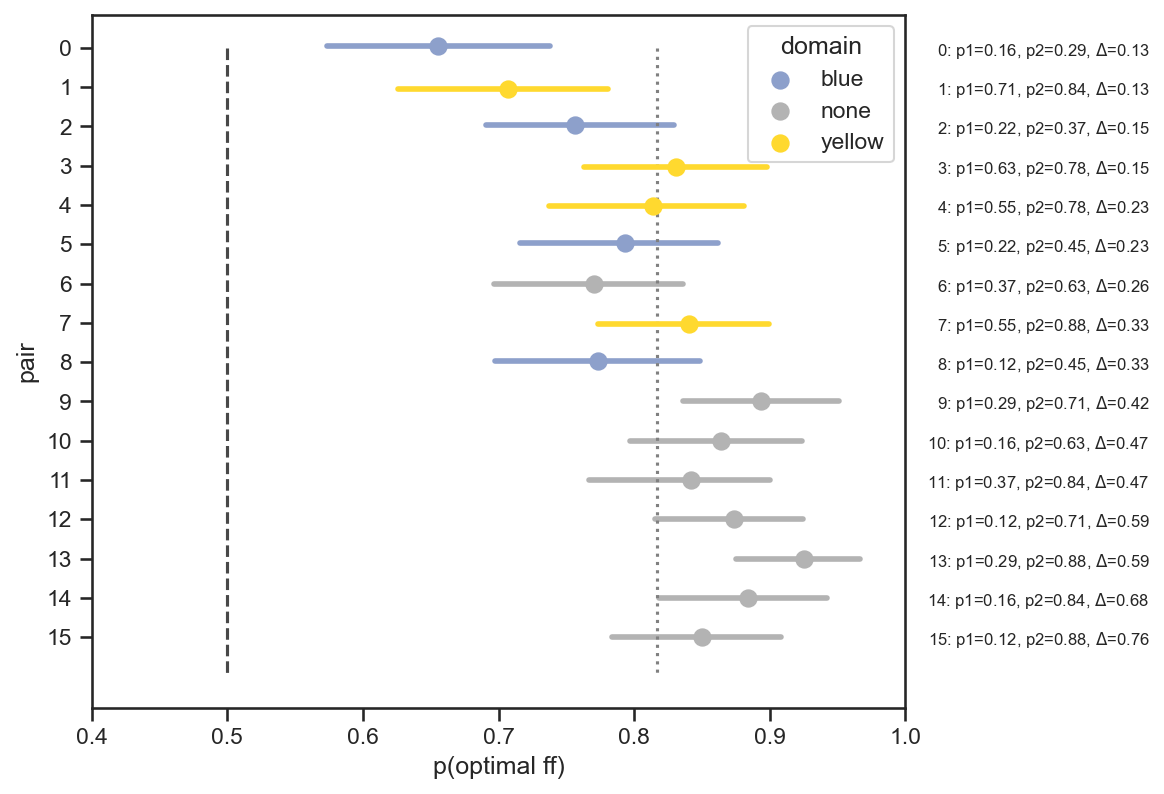

In [31]:
df2 = df.copy()
df2 = df2[df2.session.isin([0, 1, 2])]
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)
df['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)

def f(x):
    if x.p1 < 0.5 and x.p2 < 0.5:
        return 'blue'
    elif x.p1 > 0.5 and x.p2 >0.5:
        return 'yellow'
    else:
        return 'none'

df['domain'] = df.apply(f, axis=1)

df2 = df2.filter(['uncertainty', 'correct', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()
# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(7,6), 'figure.dpi': 150})
palette = sns.color_palette('viridis', n_colors=len(pairs))[::-1]
sns.set_style('ticks')

#set Set2
sns.set_palette("Set2")

sns.pointplot(x='correct', y='block', hue='domain', data=df,errorbar='se', zorder=-1, orient='h', join=False, dodge=True, palette={'none': 'C7', 'blue':'C2', 'yellow':'C5'})
plt.plot([0.5, 0.5], [0, 16], color='k', linestyle='--', zorder=-10, alpha=0.8)
plt.xlim(0.4,1)

plt.ylabel('pair')
plt.xlabel('p(optimal ff)')

plt.plot([df.correct.mean(), df.correct.mean()], [0,16], ':', color='grey')

# for each ytick from 0 to 15, plot the value of pair at the corresponding ytick
for i, pair in enumerate(pairs):
    plt.text(1.18, .2+i, f'{i}: p1={pair[0]}, p2={pair[1]}, $\\Delta$={(np.abs(pair[0]-pair[1])).round(2)}', fontsize=8, ha='right')

# plt.tight_layout()
# plt.gca().invert_yaxis()

import pingouin as pg
df['correct'] = df['correct'].astype(int)
# print the whole table
# print(pg.pairwise_ttests(dv='correct', within='block', subject='prolificID', data=df, padjust='bonf'))
pg.pairwise_tests(dv='correct', within='block', subject='prolificID', data=df, padjust='bonf').to_csv('pairwise_tests.csv')



In [53]:
for pid in df.prolificID.unique():
    print(df[df.prolificID==pid].p1.values[0], df[df.prolificID==pid].p2.values[0], df[df.prolificID==pid].trial.values[0])

0.55 0.78 0
0.63 0.78 0
0.12 0.45 0
0.22 0.37 0


c:\Users\basil\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\pairwise.py:381: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "A"] = A
c:\Users\basil\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\pairwise.py:382: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stats.loc[:, "B"] = B


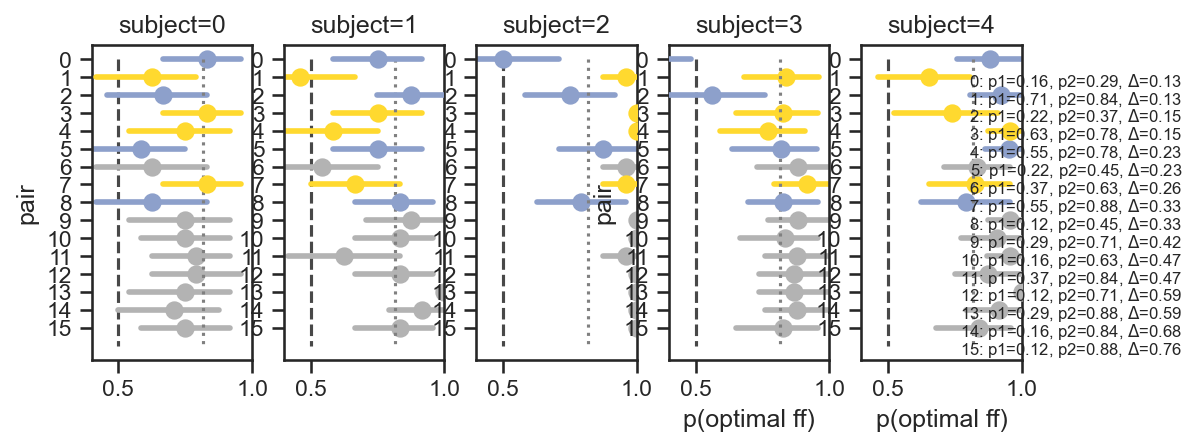

In [17]:
df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)
df['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)
pairs = set(map(tuple, np.array([df.p1.values, df.p2.values]).T))
# order by delta
pairs = sorted(pairs, key=lambda x: abs(x[0] - x[1]))
def f(x):
    if x.p1 <  0.5 and x.p2 < 0.5:
        return 'blue'
    elif x.p1 > 0.5 and x.p2 > 0.5:
        return 'yellow'
    else:
        return 'none'

df['domain'] = df.apply(f, axis=1)

df2 = df2.filter(['uncertainty', 'correct', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()
# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(8,6), 'figure.dpi': 150})
palette = sns.color_palette('viridis', n_colors=len(pairs))[::-1]
sns.set_style('ticks')
sns.set_palette("Set2")

for pid in df.id.unique():
    plt.subplot(2, 5, pid+1)
    sns.set_palette("Set2")
    ax = sns.pointplot(x='correct', y='block', 
                       data=df[df.id==pid], join=False, hue='domain', 
                       palette={'none': 'C7', 'blue':'C2', 'yellow':'C5'},errorbar='se', 
                     zorder=-1, orient='h')
# plt.setp(ax.collections, alpha=.9) #for the markers
# plt.setp(ax.lines, alpha=.5)       #for the lines
# sns.stripplot(x='uncertainty', y='correct', data=df2, color='lightgray', alpha=0.9, edgecolor='w', zorder=1,lw=2)
    plt.plot([0.5, 0.5], [0, 16], color='k', linestyle='--', zorder=-10, alpha=0.8)
    plt.xlim(0.4,1)

    plt.ylabel('')
    if pid in [0, 3]:
        plt.ylabel('pair')
        
    plt.xlabel('')
    if pid in [3, 4, 5]:
        plt.xlabel('p(optimal ff)')
    plt.title(f'subject={pid}')
    plt.plot([df.correct.mean(), df.correct.mean()], [0,16], ':', color='grey')
    # legend off
    plt.legend([],[], frameon=False)

# for each ytick from 0 to 15, plot the value of pair at the corresponding ytick
for i, pair in enumerate(pairs):
    plt.text(1.6, 1.5+i, f'{i}: p1={pair[0]}, p2={pair[1]}, $\\Delta$={(np.abs(pair[0]-pair[1])).round(2)}', fontsize=8, ha='right')

# plt.gca().invert_yaxis()

import pingouin as pg
df['correct'] = df['correct'].astype(int)
# print the whole table
# print(pg.pairwise_ttests(dv='correct', within='block', subject='prolificID', data=df, padjust='bonf'))
pg.pairwise_tests(dv='correct', within='block', subject='prolificID', data=df, padjust='bonf').to_csv('pairwise.csv')



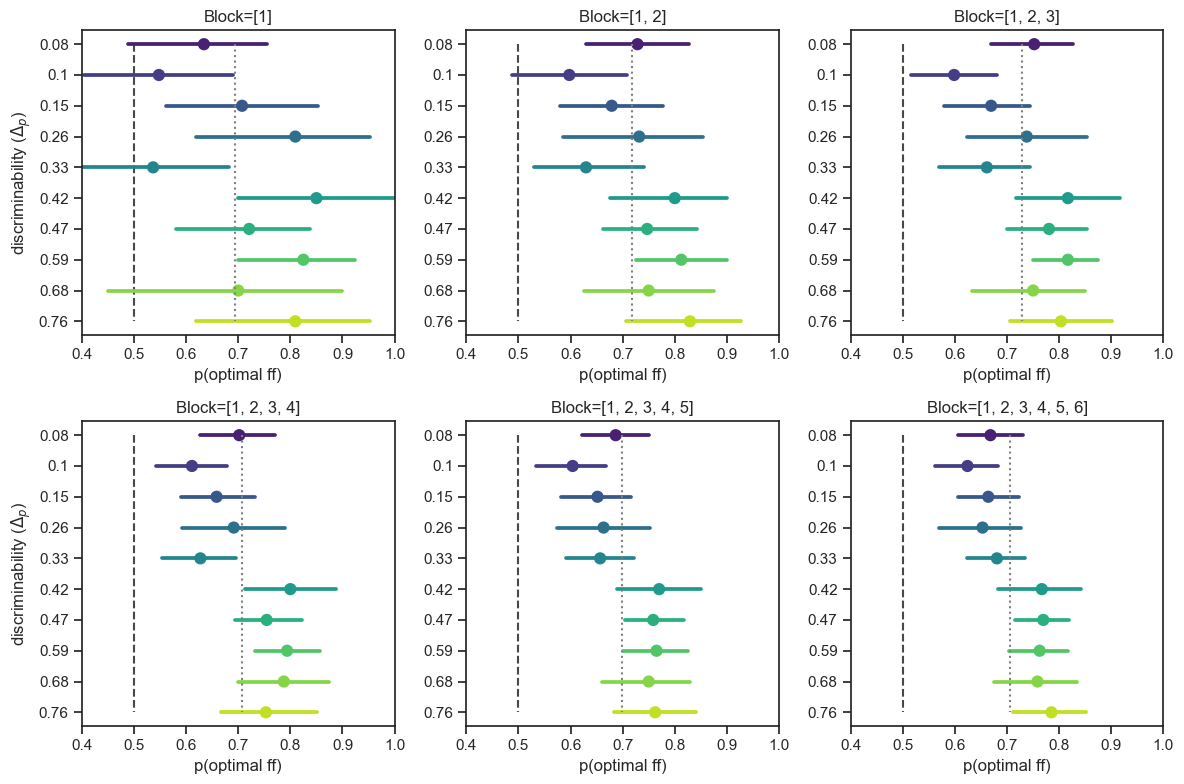

In [ ]:

df2 = df.copy()
df2['correct'] = (df2.p1 > df2.p2) & (df2.choice == 1) | (df2.p2 > df2.p1) & (df2.choice == 2)
df2['uncertainty'] = np.abs(df2.p1 - df2.p2).round(2)
df['uncertainty'] = np.abs(df.p1 - df.p2).round(2)
df['correct'] = (df.p1 > df.p2) & (df.choice == 1) | (df.p2 > df.p1) & (df.choice == 2)

df2 = df2.filter(['uncertainty', 'correct', 'prolificID']).groupby(['uncertainty', 'prolificID'], as_index=False).mean()
# select only prolificID where correct > 0.6
# ids = means[means > 0.6].index

# df2 = df2[df2.prolificID.isin(ids)]


# sns.barplot(x='prolificID', y='correct', data=df2)
# sns.lineplot(x='t', y='correct', hue="prolificID", data=df2, color='black')
sns.set(rc={'figure.figsize':(12,8), 'figure.dpi': 100})
blocklist=[]
for block in range(6):
    # blocklist = []
    blocklist.append(block)
    dff = df[df.session.isin(blocklist)]
    sns.set_style('ticks')
    plt.subplot(2, 3, block+1)
    ax = sns.pointplot(x='correct', y='uncertainty', data=dff, palette='viridis', errorbar='se', plot_kws=dict(alpha=0.4), alpha=.4, zorder=-1, orient='h')
# plt.setp(ax.collections, alpha=.9) #for the markers
# plt.setp(ax.lines, alpha=.5)       #for the lines
# sns.stripplot(x='uncertainty', y='correct', data=df2, color='lightgray', alpha=0.9, edgecolor='w', zorder=1,lw=2)
    plt.plot([0.5, 0.5], [0, 9], color='k', linestyle='--', zorder=-10, alpha=0.8)
    plt.plot([dff.correct.mean(), dff.correct.mean()], [0, 9], ':', color='grey')
    plt.xlim(0.4,1)
    if block in [0, 3]:
        plt.ylabel('discriminability ($\\Delta_p$)')
    # plt.ylabel('discriminability ($\\Delta_p$)')
    else:
        plt.ylabel('')
    plt.xlabel('p(optimal ff)')
    plt.title(f'Block={[i+1 for i in blocklist]}')
plt.tight_layout()
# import pingouin as pg
# df['correct'] = df['correct'].astype(int)
# pg.pairwise_tests(data=df, dv='correct', within='uncertainty', padjust='bonf', subject='prolificID')